# Prediction on Diabetes Patient's Hospital Readmission

![](https://www.docwirenews.com/wp-content/uploads/2019/05/readmissions.jpg)

Problem Statement and Objective
A hospital readmission is when a patient who is discharged from the hospital, gets re-admitted again within a certain period of time. Hospital readmission rates for certain conditions are now considered an indicator of hospital quality, and also affect the cost of care adversely. For this reason, Centers for Medicare & Medicaid Services established the Hospital Readmissions Reduction Program which aims to improve quality of care for patients and reduce health care spending by applying payment penalties to hospitals that have more than expected readmission rates for certain conditions. Although diabetes is not yet included in the penalty measures, the program is regularly adding new disease conditions to the list, now totaling 6 for FY2018. In 2011, American hospitals spent over $41 billion on diabetic patients who got readmitted within 30 days of discharge. Being able to determine factors that lead to higher readmission in such patients, and correspondingly being able to predict which patients will get readmitted can help hospitals save millions of dollars while improving quality of care. So, with that background in mind, we used a medical claims dataset (description below), to answer these questions:

1. What factors are the strongest predictors of hospital readmission in diabetic patients?
2. How well can we predict hospital readmission in this dataset with limited features?

# Data Set Description


**VARIABLE NAMES**: DESCRIPTION
* **Encounter ID**	Unique identifier of an encounter
* **Patient number**	Unique identifier of a patient
* **Race**	Values: Caucasian, Asian, African American, Hispanic, and other
* **Gender**	Values: male, female, and unknown/invalid
* **Age**	Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
* **Weight**	Weight in pounds
* **Admission type**	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* **Discharge disposition**	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* **Admission source**	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* **Time in hospital**	Integer number of days between admission and discharge
* **Payer code**	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* **Medical specialty**	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* **Number of lab procedures**	Number of lab tests performed during the encounter
* **Number of procedures** Numeric	Number of procedures (other than lab tests) performed during the encounter
* **Number of medications**	Number of distinct generic names administered during the encounter
* **Number of outpatient visits** Number of outpatient visits of the patient in the year preceding the encounter
* **Number of emergency visits**	Number of emergency visits of the patient in the year preceding the encounter
* **Number of inpatient visits**	Number of inpatient visits of the patient in the year preceding the encounter
* **Diagnosis 1**	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* **Diagnosis 2**	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* **Diagnosis 3** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* **Number of diagnoses**	Number of diagnoses entered to the system 0%
* **Glucose serum test result**	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* **A1c test result**	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* **Change of medications**	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* **Diabetes medications**	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* 24 features for medications	For the generic names: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone**, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* **Readmitted**	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission










# Data Preparation & Exploration 

In [4]:
#Loading libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#loading Dataset
df = pd.read_csv("G:\Datasets\capstone_project-I/diabetic_data.csv")

In [6]:
#displaying first 10 rows of data
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


In [7]:
df = df.rename(columns= {'glyburide-metformin':'glyburide_metformin'})
df = df.rename(columns= {'glipizide-metformin':'glipizide_metformin'})
df = df.rename(columns= {'glimepiride-pioglitazone':'glimepiride_pioglitazone'})
df = df.rename(columns= {'metformin-rosiglitazone':'metformin_rosiglitazone'})
df = df.rename(columns= {'metformin-pioglitazone':'metformin_pioglitazone'})

In [8]:
#checking shape of the dataset
df.shape

(101766, 50)

In [9]:
#Checking data types of each variable
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [10]:
#Checking for missing values in dataset
#In the dataset missing values are represented as '?' sign
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide_metformin 0
glipizide_metformin 0
glimepiride_pioglitazone 0
metformin_rosiglitazone 0
metformin_pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [11]:
# gender was coded differently so we use a custom count for this one            
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())            

gender 3


## Dealing with Missing Values
Variable weight contains approximate 98% of the missing values so there is no significance in filling those missing values so we decided to drop these variables. Variable Payer code and medical specialty contains approximate 40% missing values so we also dropped these variables. Variables race, diag_1, diag_2, diag_3 and gender contains very less missing values as compared to other attributes which we dropped so for these attributes we also decided to drop those where missing values contains.

In [12]:
#dropping columns with large number of missing values
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [13]:
drop_Idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)

drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]

variables (drugs named citoglipton and examide), all records have the same value. So essentially these cannot provide any interpretive or discriminatory information for predicting readmission so we decided to drop these two variables


In [14]:
df = df.drop(['citoglipton', 'examide'], axis = 1)

In [15]:
#Checking for missing values in the data
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())
            
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())   

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide_metformin 0
glipizide_metformin 0
glimepiride_pioglitazone 0
metformin_rosiglitazone 0
metformin_pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 0


## Feature Engineering

This is highly subjective, and partly depends on a knowledge of health care services, and making sense of the potential relationships between features. There are perhaps thousands of ways to try here. We tried some...

* Service utilization: The data contains variables for number of inpatient (admissions), emergency room visits and outpatient visits for a given patient in the previous one year. These are (crude) measures of how much hospital/clinic services a person has used in the past year. We added these three to create a new variable called service utilization (see figure below). The idea was to see which version gives us better results. Granted, we did not apply any special weighting to the three ingredients of service utilization but we wanted to try something simple at this stage.



In [16]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

* Number of medication changes: The dataset contains 23 features for 23 drugs (or combos) which indicate for each of these, whether a change in that medication was made or not during the current hospital stay of patient. Medication change for diabetics upon admission has been shown by previous research to be associated with lower readmission rates. We decided to count how many changes were made in total for each patient, and declared that a new feature. The reasoning here was to both simplify the model and possibly discover a relationship with number of changes regardless of which drug was changed.

In [17]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide_metformin', 'tolazamide', 'metformin_pioglitazone','metformin_rosiglitazone', 'glimepiride_pioglitazone', 'glipizide_metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]
    
df['numchange'].value_counts()  

0    70142
1    24922
2     1271
3      106
4        5
Name: numchange, dtype: int64

In [18]:
# re-encoding admission type, discharge type and admission source into fewer categories

df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)
df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)

* Encoding some variables: The original dataset used string values for gender, race, medication change, and each of the 23 drugs used. To better fit those variables into our model, we interpret the variables to numeric binary variables to reflect their nature. For example, we encoded the “ medication change ” feature from “No” (no change) and “Ch” (changed) into 0 and 1. 


In [19]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
# keys is the same as before
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

We also reduced both A1C test result and Glucose serum test result into categories of Normal, Abnormal and Not tested.


In [20]:
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

* Dealing with age: There are different ways to deal with this. The dataset only gives us age as 10 year categories, so we don’t know the exact age of each patient. The previous study on this dataset used age categories as nominal variables, but we wanted to be able to see the effect of increasing age on readmission, even if in a crude way. To do that, we assume that age of the patient on average lies at the midpoint of the age category. For example, if the patient’s age category is 20–30 years, then we assume the age = 25 years. So we converted age categories to midpoints, resulting in a numeric variable:

In [21]:
# code age intervals [0-10) - [90-100) from 1-10
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'].value_counts()

8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: age, dtype: int64

Collapsing of Multiple Encounters for same patient Some patients in the dataset had more than one encounter.We could not count them as independent encounters because that bias the results towards those patients who had multiple encounters. Thus we tried multiple techniques to collapse and consolidate multiple encounters for same patient such as:

* Considering more than 2 readmissions across multiple encounters as readmission for collapsed record.
* Considering average stay at hospital across multiple encounters.
* Considering the percentage of the medication changes across multiple encounters
* Considering the total number of the encounters to replace the encounter unique ID
* Considering the combination of diagnoses across multiple encounters as a list However, taking the features such as “diagnosis”, for instance, we did not find it not meaningful to combine multiple categorical values into an array for building data model. We then considered first encounter and last encounter separately as possible representations of multiple encounters. However, last encounters gave extremely imbalanced data for readmissions (96/4 Readmissions vs No Readmissions) and thus, we decided to use first encounters of patients with multiple encounters. This resulted in dataset being reduced to about 70,000 encounters:

In [22]:
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape
(70442, 55)

(70442, 55)

In [23]:
df.head().T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,0,0,1,1,1
age,2,3,4,5,6
admission_type_id,1,1,1,1,1
discharge_disposition_id,1,1,1,1,1
admission_source_id,7,7,7,7,1
time_in_hospital,3,2,2,1,3
num_lab_procedures,59,11,44,51,31


* Encoding the outcome variable: The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not. The variable actually has < 30, > 30 and No Readmission categories. To reduce our problem to a binary classification, we combined the readmission after 30 days and no readmission into a single category:

In [24]:
df['readmitted'].value_counts()

NO     50731
>30    34649
<30    11066
Name: readmitted, dtype: int64

In [25]:
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

* Categorization of diagnoses: The dataset contained up to three diagnoses for a given patient (primary, secondary and additional). However, each of these had 700–900 unique ICD codes and it is extremely difficult to include them in the model and interpret meaningfully. Therefore, we collapsed these diagnosis codes into 9 disease categories in an almost similar fashion to that done in the original publication using this dataset. These 9 categories include Circulatory, Respiratory, Digestive, Diabetes, Injury, Musculoskeletal, Genitourinary, Neoplasms, and Others. Although we did this for primary, secondary and additional diagnoses, we eventually decided to use only the primary diagnosis in our model. Doing this in python was slightly cumbersome because, well, we are mapping the disease codes to certain category names. Below code should demonstrate this easily.

In [26]:
# Creating additional columns for diagnosis# 
df['level1_diag1'] = df['diag_1']
df['level2_diag1'] = df['diag_1']
df['level1_diag2'] = df['diag_2']
df['level2_diag2'] = df['diag_2']
df['level1_diag3'] = df['diag_3']
df['level2_diag3'] = df['diag_3']

In [27]:
df.loc[df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
df.loc[df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
df.loc[df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
df.loc[df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
df['level1_diag1'] = df['level1_diag1'].replace('?', -1)
df['level2_diag1'] = df['level2_diag1'].replace('?', -1)
df['level1_diag2'] = df['level1_diag2'].replace('?', -1)
df['level2_diag2'] = df['level2_diag2'].replace('?', -1)
df['level1_diag3'] = df['level1_diag3'].replace('?', -1)
df['level2_diag3'] = df['level2_diag3'].replace('?', -1)

In [28]:
df['level1_diag1'] = df['level1_diag1'].astype(float)
df['level2_diag1'] = df['level2_diag1'].astype(float)
df['level1_diag2'] = df['level1_diag2'].astype(float)
df['level2_diag2'] = df['level2_diag2'].astype(float)
df['level1_diag3'] = df['level1_diag3'].astype(float)
df['level2_diag3'] = df['level2_diag3'].astype(float)

In [29]:
for index, row in df.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        df.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        df.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        df.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        df.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        df.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        df.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        df.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        df.loc[index, 'level1_diag1'] = 8
    else:
        df.loc[index, 'level1_diag1'] = 0
        
    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        df.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        df.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        df.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        df.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        df.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        df.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
        df.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        df.loc[index, 'level1_diag2'] = 8
    else:
        df.loc[index, 'level1_diag2'] = 0
    
    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        df.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        df.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        df.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        df.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        df.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        df.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        df.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        df.loc[index, 'level1_diag3'] = 8
    else:
        df.loc[index, 'level1_diag3'] = 0


In [30]:
for index, row in df.iterrows():
    if (row['level2_diag1'] >= 390 and row['level2_diag1'] < 399):
        df.loc[index, 'level2_diag1'] = 1
    elif (row['level2_diag1'] >= 401 and row['level2_diag1'] < 415):
        df.loc[index, 'level2_diag1'] = 2
    elif (row['level2_diag1'] >= 415 and row['level2_diag1'] < 460):
        df.loc[index, 'level2_diag1'] = 3
    elif (np.floor(row['level2_diag1']) == 785):
        df.loc[index, 'level2_diag1'] = 4
    elif (row['level2_diag1'] >= 460 and row['level2_diag1'] < 489):
        df.loc[index, 'level2_diag1'] = 5
    elif (row['level2_diag1'] >= 490 and row['level2_diag1'] < 497):
        df.loc[index, 'level2_diag1'] = 6
    elif (row['level2_diag1'] >= 500 and row['level2_diag1'] < 520):
        df.loc[index, 'level2_diag1'] = 7
    elif (np.floor(row['level2_diag1']) == 786):
        df.loc[index, 'level2_diag1'] = 8
    elif (row['level2_diag1'] >= 520 and row['level2_diag1'] < 530):
        df.loc[index, 'level2_diag1'] = 9
    elif (row['level2_diag1'] >= 530 and row['level2_diag1'] < 544):
        df.loc[index, 'level2_diag1'] = 10
    elif (row['level2_diag1'] >= 550 and row['level2_diag1'] < 554):
        df.loc[index, 'level2_diag1'] = 11
    elif (row['level2_diag1'] >= 555 and row['level2_diag1'] < 580):
        df.loc[index, 'level2_diag1'] = 12
    elif (np.floor(row['level2_diag1']) == 787):
        df.loc[index, 'level2_diag1'] = 13
    elif (np.floor(row['level2_diag1']) == 250):
        df.loc[index, 'level2_diag1'] = 14
    elif (row['level2_diag1'] >= 800 and row['level2_diag1'] < 1000):
        df.loc[index, 'level2_diag1'] = 15
    elif (row['level2_diag1'] >= 710 and row['level2_diag1'] < 740):
        df.loc[index, 'level2_diag1'] = 16
    elif (row['level2_diag1'] >= 580 and row['level2_diag1'] < 630):
        df.loc[index, 'level2_diag1'] = 17
    elif (np.floor(row['level2_diag1']) == 788):
        df.loc[index, 'level2_diag1'] = 18
    elif (row['level2_diag1'] >= 140 and row['level2_diag1'] < 240):
        df.loc[index, 'level2_diag1'] = 19
    elif row['level2_diag1'] >= 240 and row['level2_diag1'] < 280 and (np.floor(row['level2_diag1']) != 250):
        df.loc[index, 'level2_diag1'] = 20
    elif (row['level2_diag1'] >= 680 and row['level2_diag1'] < 710) or (np.floor(row['level2_diag1']) == 782):
        df.loc[index, 'level2_diag1'] = 21
    elif (row['level2_diag1'] >= 290 and row['level2_diag1'] < 320):
        df.loc[index, 'level2_diag1'] = 22
    else:
        df.loc[index, 'level2_diag1'] = 0
        
    if (row['level2_diag2'] >= 390 and row['level2_diag2'] < 399):
        df.loc[index, 'level2_diag2'] = 1
    elif (row['level2_diag2'] >= 401 and row['level2_diag2'] < 415):
        df.loc[index, 'level2_diag2'] = 2
    elif (row['level2_diag2'] >= 415 and row['level2_diag2'] < 460):
        df.loc[index, 'level2_diag2'] = 3
    elif (np.floor(row['level2_diag2']) == 785):
        df.loc[index, 'level2_diag2'] = 4
    elif (row['level2_diag2'] >= 460 and row['level2_diag2'] < 489):
        df.loc[index, 'level2_diag2'] = 5
    elif (row['level2_diag2'] >= 490 and row['level2_diag2'] < 497):
        df.loc[index, 'level2_diag2'] = 6
    elif (row['level2_diag2'] >= 500 and row['level2_diag2'] < 520):
        df.loc[index, 'level2_diag2'] = 7
    elif (np.floor(row['level2_diag2']) == 786):
        df.loc[index, 'level2_diag2'] = 8
    elif (row['level2_diag2'] >= 520 and row['level2_diag2'] < 530):
        df.loc[index, 'level2_diag2'] = 9
    elif (row['level2_diag2'] >= 530 and row['level2_diag2'] < 544):
        df.loc[index, 'level2_diag2'] = 10
    elif (row['level2_diag2'] >= 550 and row['level2_diag2'] < 554):
        df.loc[index, 'level2_diag2'] = 11
    elif (row['level2_diag2'] >= 555 and row['level2_diag2'] < 580):
        df.loc[index, 'level2_diag2'] = 12
    elif (np.floor(row['level2_diag2']) == 787):
        df.loc[index, 'level2_diag2'] = 13
    elif (np.floor(row['level2_diag2']) == 250):
        df.loc[index, 'level2_diag2'] = 14
    elif (row['level2_diag2'] >= 800 and row['level2_diag2'] < 1000):
        df.loc[index, 'level2_diag2'] = 15
    elif (row['level2_diag2'] >= 710 and row['level2_diag2'] < 740):
        df.loc[index, 'level2_diag2'] = 16
    elif (row['level2_diag2'] >= 580 and row['level2_diag2'] < 630):
        df.loc[index, 'level2_diag2'] = 17
    elif (np.floor(row['level2_diag2']) == 788):
        df.loc[index, 'level2_diag2'] = 18
    elif (row['level2_diag2'] >= 140 and row['level2_diag2'] < 240):
        df.loc[index, 'level2_diag2'] = 19
    elif row['level2_diag2'] >= 240 and row['level2_diag2'] < 280 and (np.floor(row['level2_diag2']) != 250):
        df.loc[index, 'level2_diag2'] = 20
    elif (row['level2_diag2'] >= 680 and row['level2_diag2'] < 710) or (np.floor(row['level2_diag2']) == 782):
        df.loc[index, 'level2_diag2'] = 21
    elif (row['level2_diag2'] >= 290 and row['level2_diag2'] < 320):
        df.loc[index, 'level2_diag2'] = 22
    else:
        df.loc[index, 'level2_diag2'] = 0
        
        
    if (row['level2_diag3'] >= 390 and row['level2_diag3'] < 399):
        df.loc[index, 'level2_diag3'] = 1
    elif (row['level2_diag3'] >= 401 and row['level2_diag3'] < 415):
        df.loc[index, 'level2_diag3'] = 2
    elif (row['level2_diag3'] >= 415 and row['level2_diag3'] < 460):
        df.loc[index, 'level2_diag3'] = 3
    elif (np.floor(row['level2_diag3']) == 785):
        df.loc[index, 'level2_diag3'] = 4
    elif (row['level2_diag3'] >= 460 and row['level2_diag3'] < 489):
        df.loc[index, 'level2_diag3'] = 5
    elif (row['level2_diag3'] >= 490 and row['level2_diag3'] < 497):
        df.loc[index, 'level2_diag3'] = 6
    elif (row['level2_diag3'] >= 500 and row['level2_diag3'] < 520):
        df.loc[index, 'level2_diag3'] = 7
    elif (np.floor(row['level2_diag3']) == 786):
        df.loc[index, 'level2_diag3'] = 8
    elif (row['level2_diag3'] >= 520 and row['level2_diag3'] < 530):
        df.loc[index, 'level2_diag3'] = 9
    elif (row['level2_diag3'] >= 530 and row['level2_diag3'] < 544):
        df.loc[index, 'level2_diag3'] = 10
    elif (row['level2_diag3'] >= 550 and row['level2_diag3'] < 554):
        df.loc[index, 'level2_diag3'] = 11
    elif (row['level2_diag3'] >= 555 and row['level2_diag3'] < 580):
        df.loc[index, 'level2_diag3'] = 12
    elif (np.floor(row['level2_diag3']) == 787):
        df.loc[index, 'level2_diag3'] = 13
    elif (np.floor(row['level2_diag3']) == 250):
        df.loc[index, 'level2_diag3'] = 14
    elif (row['level2_diag3'] >= 800 and row['level2_diag3'] < 1000):
        df.loc[index, 'level2_diag3'] = 15
    elif (row['level2_diag3'] >= 710 and row['level2_diag3'] < 740):
        df.loc[index, 'level2_diag3'] = 16
    elif (row['level2_diag3'] >= 580 and row['level2_diag3'] < 630):
        df.loc[index, 'level2_diag3'] = 17
    elif (np.floor(row['level2_diag3']) == 788):
        df.loc[index, 'level2_diag3'] = 18
    elif (row['level2_diag3'] >= 140 and row['level2_diag3'] < 240):
        df.loc[index, 'level2_diag3'] = 19
    elif row['level2_diag3'] >= 240 and row['level2_diag3'] < 280 and (np.floor(row['level2_diag3']) != 250):
        df.loc[index, 'level2_diag3'] = 20
    elif (row['level2_diag3'] >= 680 and row['level2_diag3'] < 710) or (np.floor(row['level2_diag3']) == 782):
        df.loc[index, 'level2_diag3'] = 21
    elif (row['level2_diag3'] >= 290 and row['level2_diag3'] < 320):
        df.loc[index, 'level2_diag3'] = 22
    else:
        df.loc[index, 'level2_diag3'] = 0

## Data Visualization

#### Distribution of Readmission
Our target variable is imbalance. Number of readmitted patient are quite less as compared to Not readmitted

c:\Users\sivas\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distrinution of Readmission')

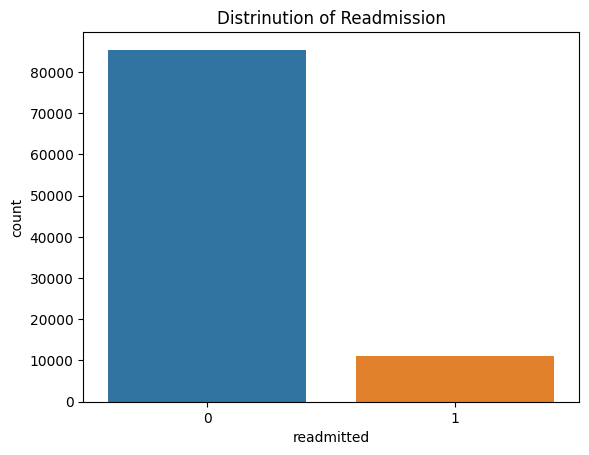

In [31]:
# Distribution of Readmission 
sns.countplot(df['readmitted']).set_title('Distrinution of Readmission')

#### Time in Hospital and Readmission


Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

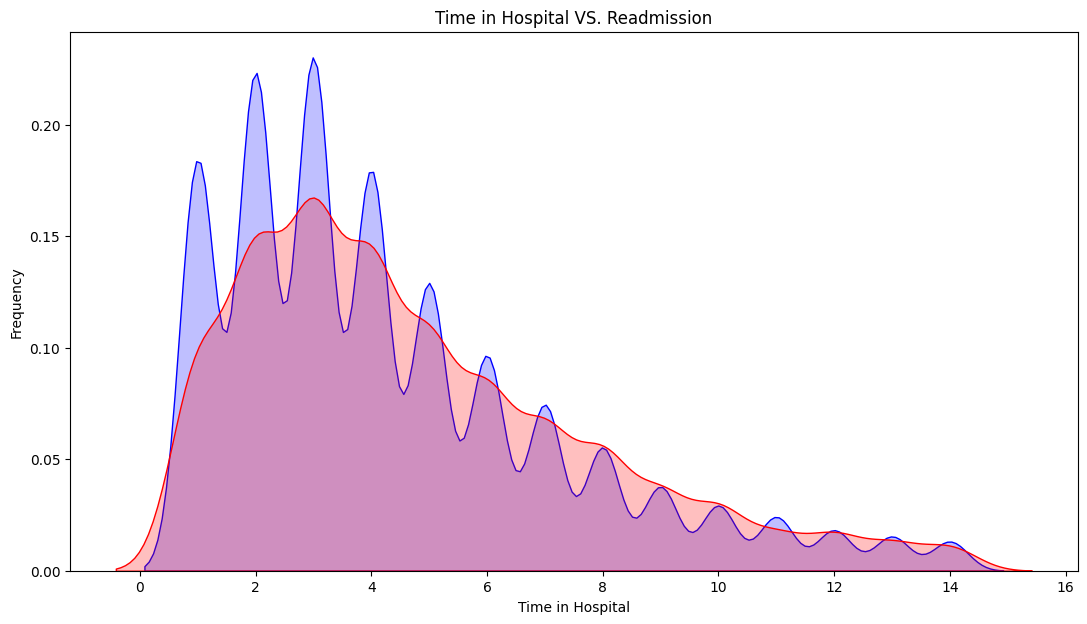

In [32]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

#### Age and Readmission

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

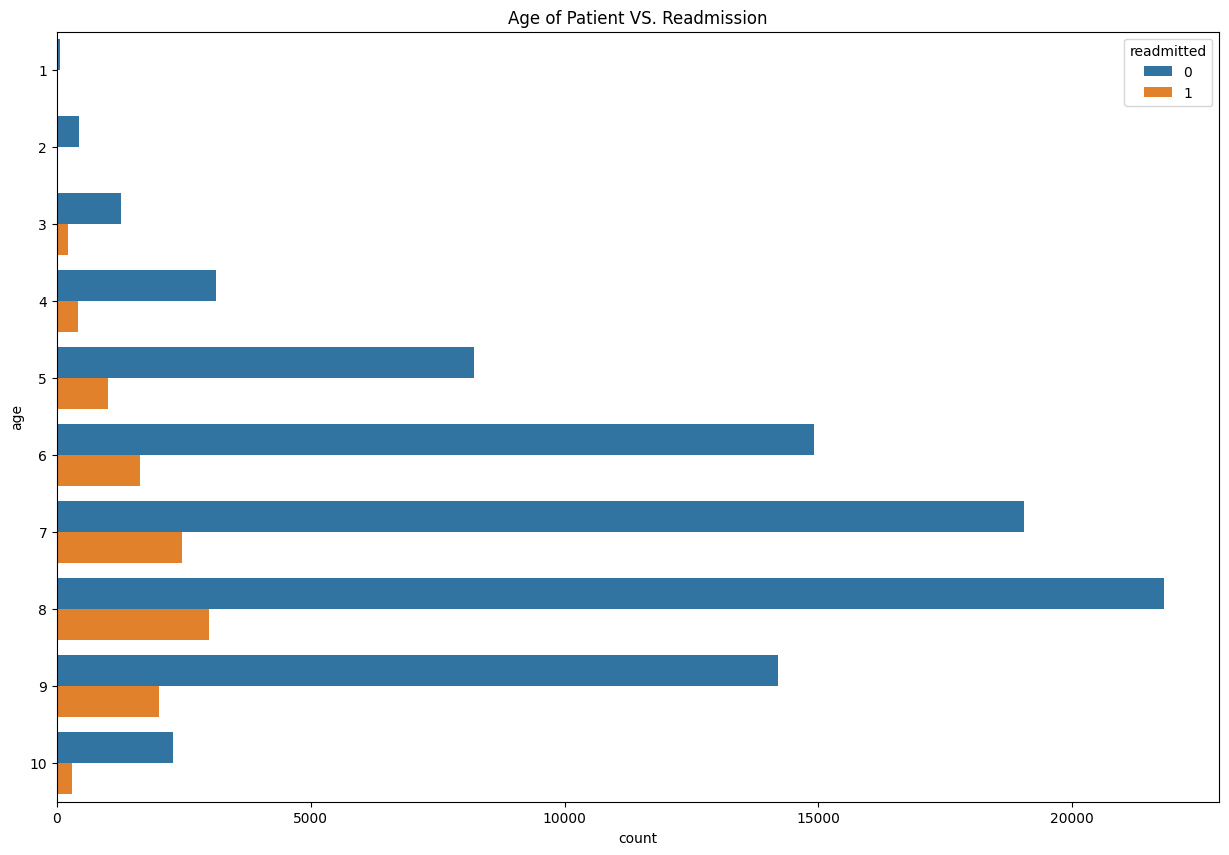

In [33]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

#### Ethnicity of patient and Readmission

<AxesSubplot:xlabel='count', ylabel='race'>

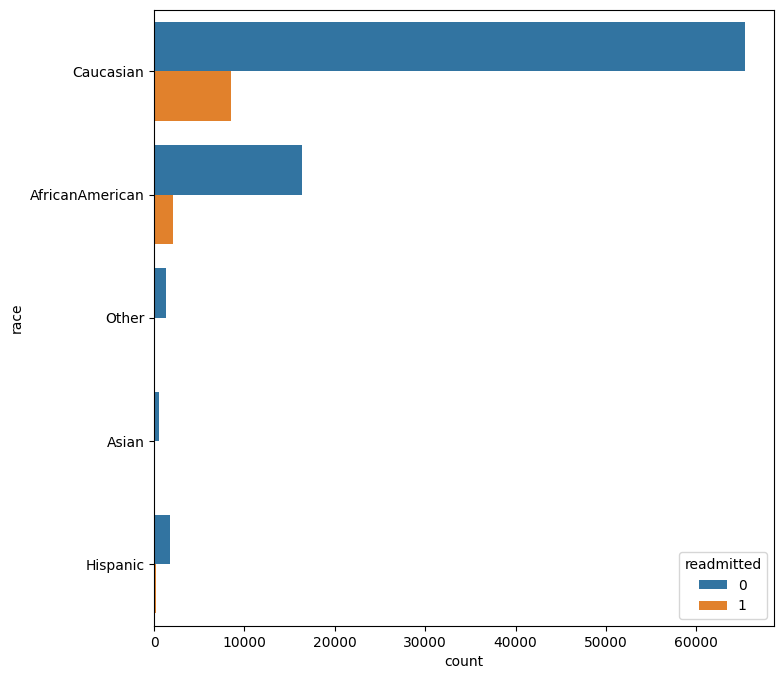

In [34]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['race'], hue = df['readmitted'])

#### Number of medication used and Readmission

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

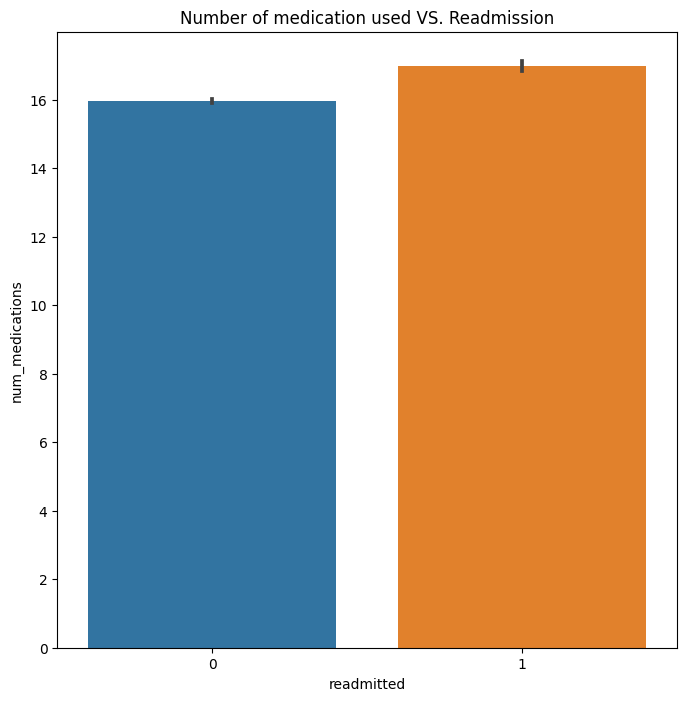

In [35]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

#### Gender and Readmission
* Male = 1
* Female = 0

c:\Users\sivas\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

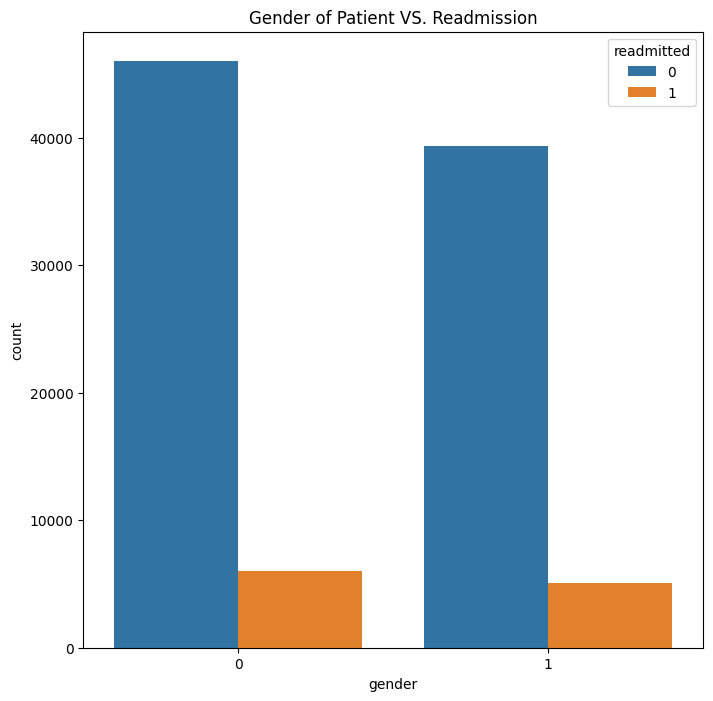

In [36]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['gender'], hue = df['readmitted']).set_title("Gender of Patient VS. Readmission")

#### Change of Medication and Readmission
* Change = 1
* No Change = 0

c:\Users\sivas\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Change of Medication VS. Readmission')

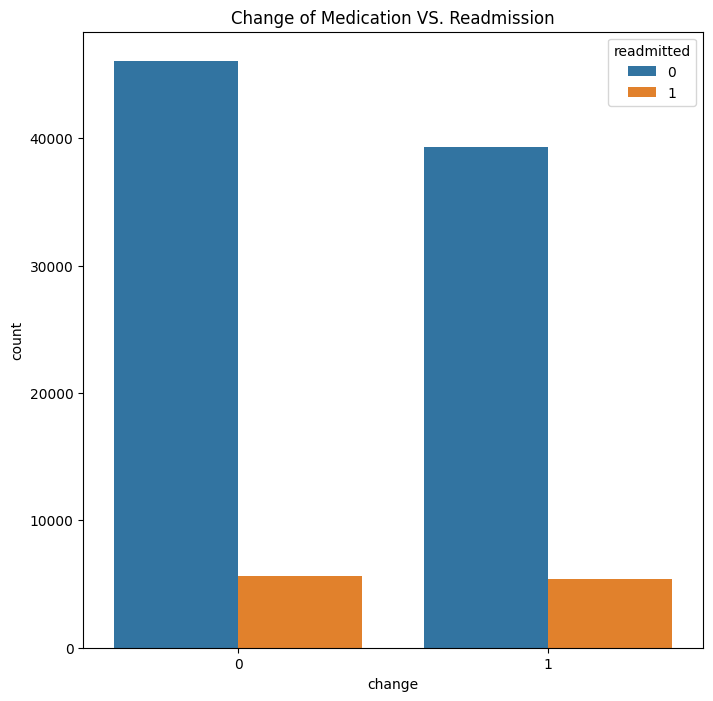

In [37]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['change'], hue = df['readmitted']).set_title('Change of Medication VS. Readmission')

#### Diabetes Medication prescribed and Readmission
* Diabetes Medication - medications Nominal Indicates if there was any diabetic medication prescribed.
* Values: “yes” : 1 “no” : 0

c:\Users\sivas\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

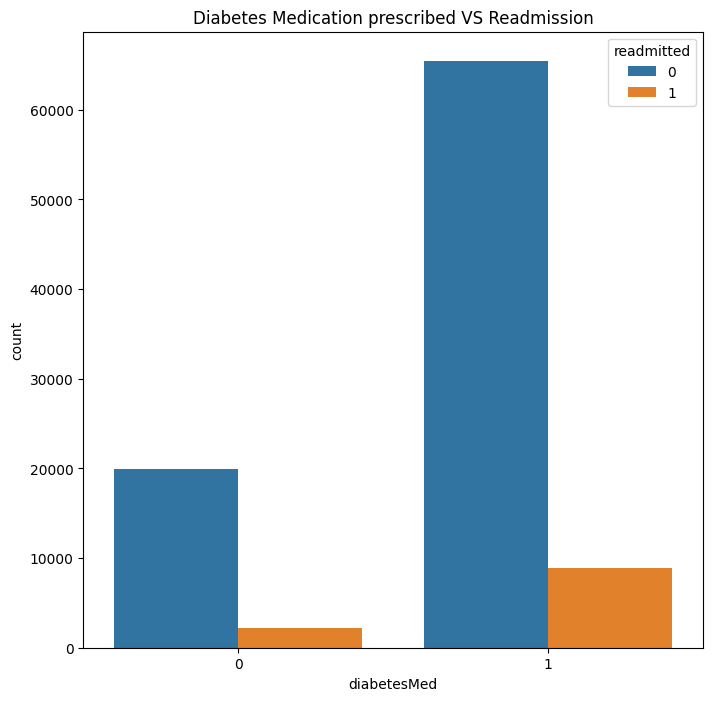

In [38]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df['diabetesMed'], hue = df['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')

#### Service Utilization and Readmission


Text(0.5, 1.0, 'Service Utilization VS. Readmission')

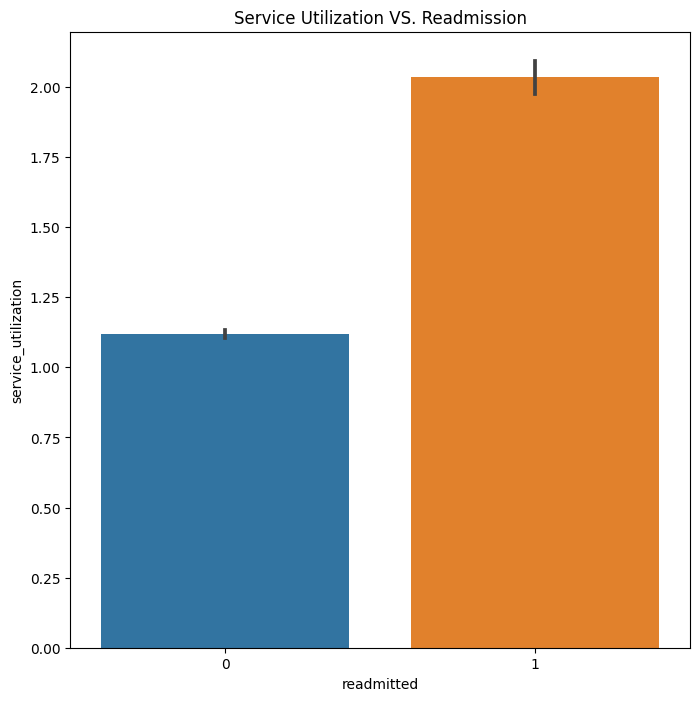

In [39]:
fig = plt.figure(figsize=(8,8))
sns.barplot( y = df['service_utilization'], x = df['readmitted']).set_title('Service Utilization VS. Readmission')

#### Glucose serum test result and Readmission
*Glucose Serum test* - A blood glucose test is used to find out if your blood sugar levels are in the healthy range. It is often used to help diagnose and monitor diabetes.

* '>200' : 1 = indicates diabetes
* '>300' : 1 = Indicates diabetes
* 'Norm' : 0 = Normal
* 'None' : -99 = test was not taken

Text(0.5, 1.0, 'Glucose test serum test result VS. Readmission')

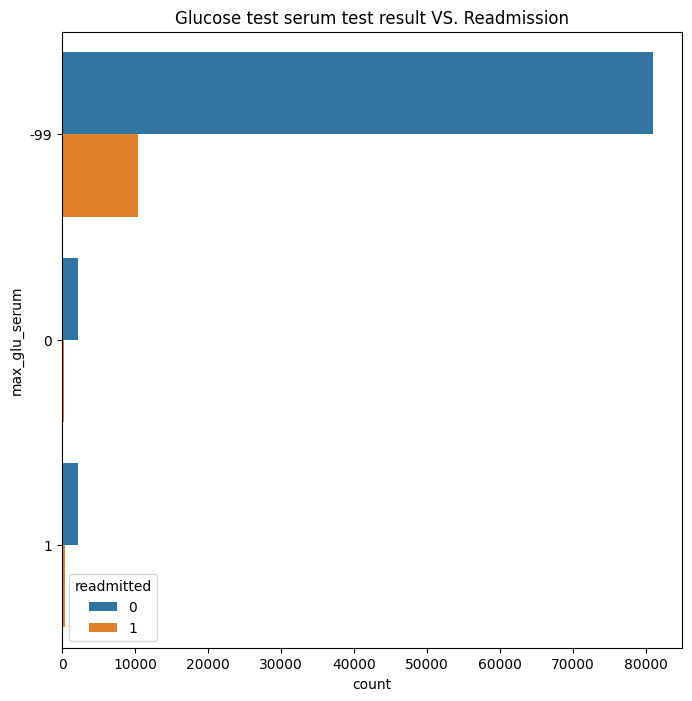

In [40]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['max_glu_serum'], hue = df['readmitted']).set_title('Glucose test serum test result VS. Readmission')

A1C result and Readmission
*A1C test* - The A1C test is a blood test that provides information about your average levels of blood glucose, also called blood sugar, over the past 3 months.
*  '>7'   :  1   
*  '>8'   :  1   
*    Norm :  0  = Normal 
*    None : -99 = Test was not taken

Text(0.5, 1.0, 'A1C test result VS. Readmission')

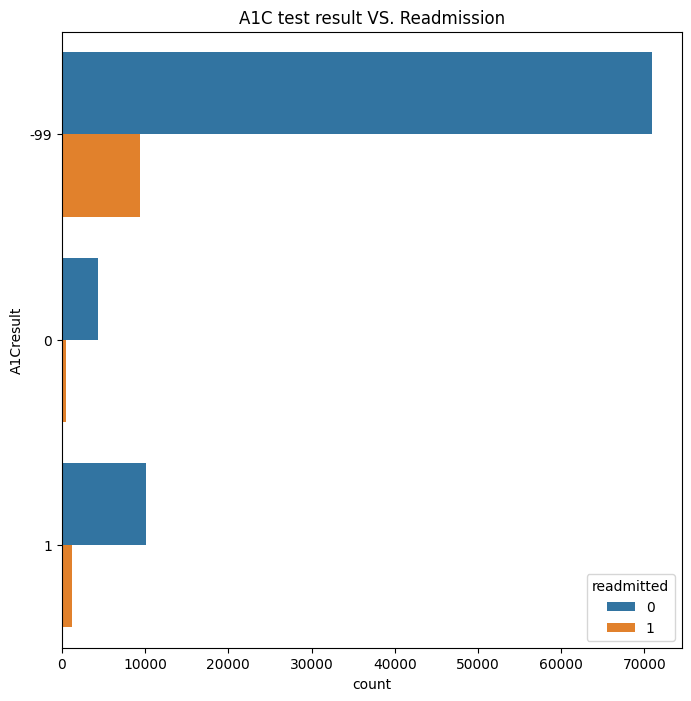

In [41]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y= df['A1Cresult'], hue = df['readmitted']).set_title('A1C test result VS. Readmission')

#### Number of lab procedure and Readmission

Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

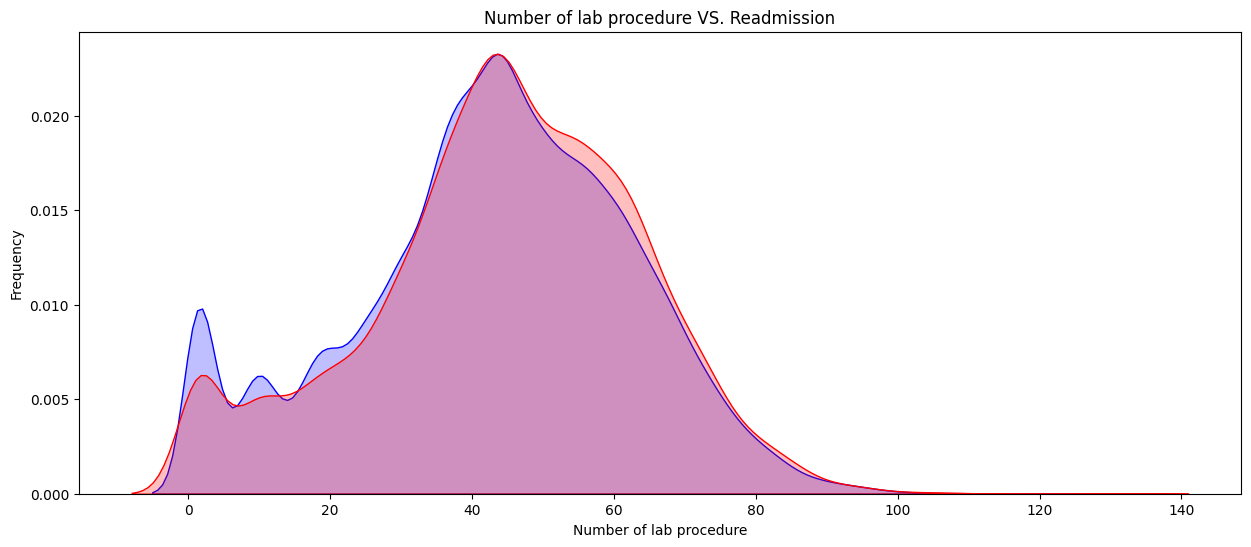

In [42]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

### Pre-Modeling Data Preprocessing
This code converts age as categorical variable to a continuous approximation by assuming mid-point of each age-category as the actual age value. This is done to avoid having to deal with age as a dummy variable in the models which makes interpretation very cumbersome. Also, since age category is not purely nominal but ordinal, we do not want to lose that information by treating it as a simple categorical variable

In [43]:
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
print(df.age.value_counts())

8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: age, dtype: int64
75    24815
65    21521
55    16546
85    16223
45     9208
35     3538
95     2594
25     1471
15      466
5        64
Name: age, dtype: int64


# convert data type of nominal features in dataframe to 'object' type

In [44]:
df["encounter_id"] = df.encounter_id.astype('object')
df["patient_nbr"] = df.patient_nbr.astype('object')
df["gender"] = df.gender.astype('object')
df["admission_type_id"] = df.admission_type_id.astype('object')
df["discharge_disposition_id"] = df.discharge_disposition_id.astype('object')
df["admission_source_id"] = df.admission_source_id.astype('object')

df["A1Cresult"] = df.A1Cresult.astype('object')
df["metformin"] = df.metformin.astype('object')
df["repaglinide"] = df.repaglinide.astype('object')
df["nateglinide"] = df.nateglinide.astype('object')
df["chlorpropamide"] = df.chlorpropamide.astype('object')
df["glimepiride"] = df.glimepiride.astype('object')
df["acetohexamide"] = df.acetohexamide.astype('object')

df["glipizide"] = df.glipizide.astype('object')
df["glyburide"] = df.glyburide.astype('object')
df["tolbutamide"] = df.tolbutamide.astype('object')
df["pioglitazone"] = df.pioglitazone.astype('object')
df["rosiglitazone"] = df.rosiglitazone.astype('object')
df["acarbose"] = df.acarbose.astype('object')
df["miglitol"] = df.miglitol.astype('object')


In [45]:
df["troglitazone"] = df.troglitazone.astype('object')
df["tolazamide"] = df.tolazamide.astype('object')
df["insulin"] = df.insulin.astype('object')
df["glyburide_metformin"] = df.glyburide_metformin.astype('object')
df["glipizide_metformin"] = df.glipizide_metformin.astype('object')

df["glimepiride_pioglitazone"] = df.glimepiride_pioglitazone.astype('object')
df["metformin_rosiglitazone"] = df.metformin_rosiglitazone.astype('object')
df["metformin_pioglitazone"] = df.metformin_pioglitazone.astype('object')
df["change"] = df.change.astype('object')
df["diabetesMed"] = df.diabetesMed.astype('object')

df["age"] = df.age.astype('object')
df["A1Cresult"] = df.A1Cresult.astype('object')
df["max_glu_serum"] = df.max_glu_serum.astype('object')
df["level1_diag1"] = df.level1_diag1.astype('object')
df["level1_diag2"] = df.level1_diag2.astype('object')
df["level1_diag3"] = df.level1_diag3.astype('object')
df["level2_diag1"] = df.level2_diag1.astype('object')
df["level2_diag2"] = df.level2_diag2.astype('object')
df["level2_diag3"] = df.level2_diag3.astype('object')

In [46]:
df.dtypes

encounter_id                object
patient_nbr                 object
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

* Number of medication used: Another possibly related factor could be the total number of medications used by the patient (which may indicate severity of their condition and/or the intensity of care). So we created another feature by counting the medications used during the encounter (keys variable in code below is continued from above):

In [47]:
df['nummed'] = 0

for col in keys:
    df['nummed'] = df['nummed'] + df[col]
df['nummed'].value_counts()

1    44589
0    22156
2    20901
3     7448
4     1290
5       57
6        5
Name: nummed, dtype: int64

In [48]:
# get list of only numeric features
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
num_col

['num_procedures',
 'number_inpatient',
 'num_medications',
 'numchange',
 'num_lab_procedures',
 'number_outpatient',
 'number_emergency',
 'number_diagnoses',
 'time_in_hospital',
 'service_utilization']

In [49]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value -  2

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)
    
    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = df[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        
        if len(df[df[i] == 0])/len(df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
            
            kurtvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [50]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,num_procedures,1.313236,0.856100,1.703183,No,NA,1.313236,0.856100,1.703183
1,number_inpatient,3.566269,20.044813,1.269975,Yes,log1p,1.425127,1.319186,0.513389
2,num_medications,1.339187,3.549325,8.072516,No,NA,1.339187,3.549325,8.072516
3,numchange,1.426548,1.451898,0.488614,No,NA,1.426548,1.451898,0.488614
4,num_lab_procedures,-0.240626,-0.253275,19.656782,No,NA,-0.240626,-0.253275,19.656782
5,number_outpatient,8.767489,146.244961,1.280061,Yes,log1p,2.708627,7.648535,0.432949
6,number_emergency,22.695921,1165.140400,0.948089,Yes,log1p,3.614471,15.854105,0.318742
7,number_diagnoses,-0.807741,-0.372558,1.836659,No,NA,-0.807741,-0.372558,1.836659
8,time_in_hospital,1.127510,0.839050,2.982330,No,NA,1.127510,0.839050,2.982330
9,service_utilization,5.312374,67.194018,2.315789,Yes,log1p,1.097244,0.497241,0.665656


In [51]:
# performing the log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])
            
        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

In [52]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency','service_utilization'], axis = 1)

In [53]:
df.shape

(96446, 54)

In [54]:
# get list of only numeric features
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
numerics

['num_procedures',
 'num_medications',
 'numchange',
 'number_emergency_log1p',
 'number_outpatient_log1p',
 'num_lab_procedures',
 'number_diagnoses',
 'time_in_hospital',
 'service_utilization_log1p',
 'number_inpatient_log1p']

In [55]:
# show list of features that are categorical
df.encounter_id = df.encounter_id.astype('int64')
df.patient_nbr = df.patient_nbr.astype('int64')
df.diabetesMed = df.diabetesMed.astype('int64')
df.change = df.change.astype('int64')

# convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide_metformin', 'glipizide_metformin', \
          'glimepiride_pioglitazone', 'metformin_rosiglitazone', 'metformin_pioglitazone','A1Cresult']
df[i] = df[i].astype('int64')

df.dtypes

encounter_id                   int64
patient_nbr                    int64
race                          object
gender                        object
age                           object
admission_type_id             object
discharge_disposition_id      object
admission_source_id           object
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
diag_1                        object
diag_2                        object
diag_3                        object
number_diagnoses               int64
max_glu_serum                 object
A1Cresult                      int64
metformin                      int64
repaglinide                    int64
nateglinide                    int64
chlorpropamide                 int64
glimepiride                    int64
acetohexamide                  int64
glipizide                      int64
glyburide                      int64
tolbutamide                    int64
p

In [56]:
dfcopy = df.copy(deep = True)

In [57]:
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 2 else x)

In [58]:
# drop individual diagnosis columns that have too granular disease information
# also drop level 2 categorization (which was not comparable with any reference)
# also drop level 1 secondary and tertiary diagnoses
df.drop(['diag_1', 'diag_2', 'diag_3', 'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3',
         'level2_diag3'], axis=1, inplace=True)

In [59]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

In [60]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [61]:
df[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
1,18,3,54
2,13,2,26
3,16,2,32
4,8,1,8
5,16,3,48


In [62]:
# Feature Scaling
datf = pd.DataFrame()
datf['features'] = numerics
datf['std_dev'] = datf['features'].apply(lambda x: df[x].std())
datf['mean'] = datf['features'].apply(lambda x: df[x].mean())

In [63]:
# dropping multiple encounters while keeping either first or last encounter of these patients
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape

(67580, 55)

In [64]:
# standardize function
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [65]:
df2[numerics] = standardize(df2[numerics])
import scipy as sp
df2 = df2[(np.abs(sp.stats.zscore(df2[numerics])) < 3).all(axis=1)]

C:\Users\sivas\AppData\Local\Temp\ipykernel_13324\1394421667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[numerics] = standardize(df2[numerics])


In [66]:
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.light_palette((250, 100, 50), input="husl", n_colors=50).as_hex())
table = df2.drop(['patient_nbr', 'encounter_id'], axis=1).corr(method='pearson')
table.style.background_gradient(cmap=my_cmap, axis = 0)

c:\Users\sivas\anaconda3\envs\project\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\sivas\anaconda3\envs\project\lib\site-packages\pandas\io\formats\style.py:3556: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted,numchange,number_inpatient_log1p,number_outpatient_log1p,number_emergency_log1p,service_utilization_log1p,num_medications|time_in_hospital,num_medications|num_procedures,time_in_hospital|num_lab_procedures,num_medications|num_lab_procedures,num_medications|number_diagnoses,change|num_medications,number_diagnoses|time_in_hospital,num_medications|numchange
time_in_hospital,1.000000,0.320135,0.144392,0.441167,0.224011,0.074127,-0.012421,0.031130,0.006653,0.001164,0.008496,nan,0.013698,0.024610,0.005062,-0.004376,-0.000813,0.000816,-0.002206,0.005697,-0.006658,0.097371,-0.000302,0.002334,nan,nan,0.002794,0.094406,0.059811,0.055148,0.139670,0.051496,-0.027614,-0.001829,0.006862,0.859364,0.270542,0.853015,0.502133,0.456259,0.231169,0.938944,0.229845
num_lab_procedures,0.320135,1.000000,0.013923,0.230888,0.138471,0.275953,-0.050781,0.004737,-0.007755,-0.002344,-0.009528,nan,0.016552,0.002659,0.000595,-0.017770,-0.008809,-0.001930,-0.003635,0.005200,-0.001007,0.100137,-0.014247,-0.003791,nan,nan,-0.003981,0.064560,0.037476,0.025644,0.111876,0.049153,-0.041207,0.006784,-0.001783,0.328828,0.114754,0.674595,0.732844,0.258944,0.135242,0.322335,0.155882
num_procedures,0.144392,0.013923,1.000000,0.334918,0.060380,-0.029517,-0.057326,0.003596,-0.005481,0.005286,0.005021,nan,0.004639,0.002828,0.000057,0.012495,0.008016,-0.001833,0.001009,-0.005735,-0.000290,0.002454,-0.009110,-0.003373,nan,nan,-0.000936,-0.016197,-0.017345,0.002086,-0.010997,-0.012699,-0.017295,-0.026767,-0.030508,0.263700,0.877783,0.138598,0.244440,0.292403,0.109633,0.153126,0.075090
num_medications,0.441167,0.230888,0.334918,1.000000,0.246879,0.017807,0.079213,0.025270,0.029485,0.002097,0.043243,nan,0.055362,0.043031,0.005079,0.074775,0.058254,0.013927,0.003052,0.004254,-0.001558,0.194339,0.008746,0.004263,nan,nan,0.002838,0.233256,0.190055,0.038768,0.193801,0.034802,0.031576,0.013399,0.045034,0.752726,0.599321,0.439898,0.772237,0.898603,0.530894,0.459725,0.392592
number_diagnoses,0.224011,0.138471,0.060380,0.246879,1.000000,0.002965,-0.072136,0.031346,0.014555,-0.015598,0.011962,nan,-0.012608,-0.024172,0.000012,0.004104,-0.006777,0.006827,-0.001207,0.005222,-0.010419,0.090370,-0.002435,0.001743,nan,nan,-0.007024,0.042334,0.022503,0.039630,0.065829,0.051598,0.057902,0.050317,0.086039,0.244135,0.111045,0.219112,0.250720,0.599241,0.123807,0.484368,0.120178
A1Cresult,0.074127,0.275953,-0.029517,0.017807,0.002965,1.000000,0.037758,0.017018,0.001161,-0.001984,0.018481,nan,0.008055,0.003427,-0.001884,-0.003550,0.004826,0.000822,-0.002303,-0.003314,-0.001725,0.097721,-0.002506,0.003027,nan,nan,-0.001913,0.093606,0.072348,-0.005258,0.111597,-0.044000,-0.032616,-0.011517,-0.050729,0.062720,0.001700,0.179762,0.178755,0.028221,0.078234,0.061569,0.099571
metformin,-0.012421,-0.050781,-0.057326,0.079213,-0.072136,0.037758,1.000000,0.004808,0.015700,-0.011728,0.040138,nan,0.074350,0.137700,-0.008118,0.053039,0.094224,0.007915,0.011794,-0.003630,-0.001183,-0.024419,-0.026028,-0.001732,nan,nan,0.007992,0.353272,0.297217,-0.010145,0.019618,-0.018782,0.026385,-0.002027,0.008378,0.018048,-0.012299,-0.035697,0.008037,0.029440,0.300672,-0.034162,0.026116
repaglinide,0.031130,0.004737,0.003596,0.025270,0.031346,0.017018,0.004808,1.000000,0.001098,-0.003697,-0.008599,nan,-0.020277,-0.023441,-0.001789,0.015039,0.017576,0.024239,0.025697,-0.000800,-0.002401,0.009263,-0.005950,-0.001222,nan,nan,-0.000462,0.076469,0.065508,0.015210,0.031696,0.010728,0.000443,0.009063,0.009623,0.031432,0.008609,0.025028,0.021517,0.035126,0.069362,0.039709,0.031813
nateglinide,0.006653,-0.007755,-0.005481,

In [67]:
df2['level1_diag1'] = df2['level1_diag1'].astype('object')
df_pd = pd.get_dummies(df2, columns=['gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'level1_diag1'], drop_first = True)
just_dummies = pd.get_dummies(df_pd['race'])
df_pd = pd.concat([df_pd, just_dummies], axis=1)      
df_pd.drop(['race'], inplace=True, axis=1)

c:\Users\sivas\anaconda3\envs\project\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [68]:
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                'max_glu_serum', 'A1Cresult', 'level1_diag1' ]

In [69]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['nateglinide',
 'num_medications|numchange',
 'glyburide',
 'pioglitazone',
 'glipizide',
 'num_medications|number_diagnoses',
 'chlorpropamide',
 'tolazamide',
 'number_inpatient_log1p',
 'num_procedures',
 'glyburide_metformin',
 'acetohexamide',
 'troglitazone',
 'metformin_pioglitazone',
 'num_medications',
 'numchange',
 'number_emergency_log1p',
 'diabetesMed',
 'number_diagnoses',
 'time_in_hospital',
 'metformin',
 'patient_nbr',
 'glimepiride_pioglitazone',
 'insulin',
 'glipizide_metformin',
 'acarbose',
 'num_lab_procedures',
 'metformin_rosiglitazone',
 'service_utilization_log1p',
 'encounter_id',
 'number_diagnoses|time_in_hospital',
 'num_medications|num_procedures',
 'miglitol',
 'time_in_hospital|num_lab_procedures',
 'tolbutamide',
 'A1Cresult',
 'glimepiride',
 'rosiglitazone',
 'number_outpatient_log1p',
 'num_medications|time_in_hospital',
 'change|num_medications',
 'num_medications|num_lab_procedures',
 'repaglinide']

In [70]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

In [71]:
new_non_num_cols

['gender_1',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'discharge_disposition_id_2',
 'discharge_disposition_id_7',
 'discharge_disposition_id_10',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'discharge_disposition_id_20',
 'discharge_disposition_id_27',
 'discharge_disposition_id_28',
 'admission_source_id_4',
 'admission_source_id_7',
 'admission_source_id_8',
 'admission_source_id_9',
 'admission_source_id_11',
 'max_glu_serum_0',
 'max_glu_serum_1',
 'A1Cresult_0',
 'A1Cresult_1',
 'level1_diag1_1.0',
 'level1_diag1_2.0',
 'level1_diag1_3.0',
 'level1_diag1_4.0',
 'level1_diag1_5.0',
 'level1_diag1_6.0',
 'level1_diag1_7.0',
 'level1_diag1_8.0']

In [72]:
l = []
for feature in list(df_pd.columns):
    if '|' in feature:
        l.append(feature)
l

['num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'change|num_medications',
 'number_diagnoses|time_in_hospital',
 'num_medications|numchange']

In [73]:
df_pd.head().T

,1,2,3,4,5
encounter_id,149190,64410,500364,16680,35754
patient_nbr,55629189,86047875,82442376,42519267,82637451
age,15,25,35,45,55
time_in_hospital,-0.444872,-0.784109,-0.784109,-1.123345,-0.444872
num_lab_procedures,0.803605,-1.60206,0.051835,0.402661,-0.5997
...,...,...,...,...,...
AfricanAmerican,0,1,0,0,0
Asian,0,0,0,0,0
Caucasian,1,0,1,1,1
Hispanic,0,0,0,0,0


## Modeling

In [74]:
feature_set = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
                 'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide', 'insulin', 'glyburide_metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 'admission_source_id_4',
                 'admission_source_id_7', 'admission_source_id_9', 'max_glu_serum_0', 'max_glu_serum_1', 'A1Cresult_0',
                 'A1Cresult_1', 'num_medications|time_in_hospital', 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications|number_diagnoses',
                 'age|number_diagnoses', 'change|num_medications', 'number_diagnoses|time_in_hospital',
                 'num_medications|numchange', 'level1_diag1_1.0', 'level1_diag1_2.0', 'level1_diag1_3.0', 'level1_diag1_4.0',
                 'level1_diag1_5.0','level1_diag1_6.0', 'level1_diag1_7.0', 'level1_diag1_8.0']

In [75]:
X = df_pd[feature_set]
y = df_pd['readmitted']

### Logistic Regression

In [76]:
df_pd['readmitted'].value_counts()

0    54635
1     5071
Name: readmitted, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l1', solver='liblinear')
logit.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [78]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,All
Actual,,
0,1466,1466
1,167,167
All,1633,1633


In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

Accuracy is 0.91
Precision is 0.00
Recall is 0.00


C:\Users\sivas\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Since our target variable is having class imbalance problem, So will use SMOTE technique to resolve it


In [80]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_resample(X_train, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 43711, 1: 4053})
New dataset shape Counter({0: 43711, 1: 43711})


In [81]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l1', solver='liblinear')
logit.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [82]:
logit_pred_test = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred_test, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,1644,1512,3156
1,149,148,297
All,1793,1660,3453


In [83]:
logit_pred_train = logit.predict(X_train)

In [84]:
y_prob = logit.predict_proba(X_test)[:,1]

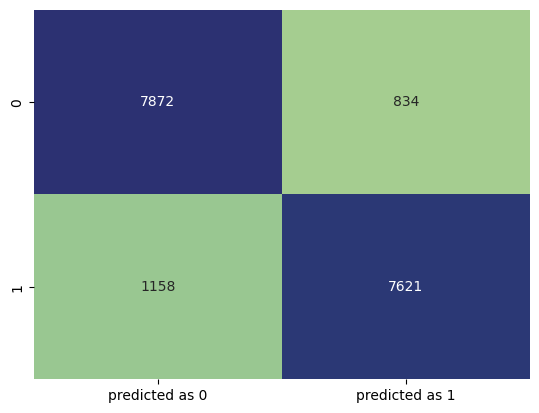

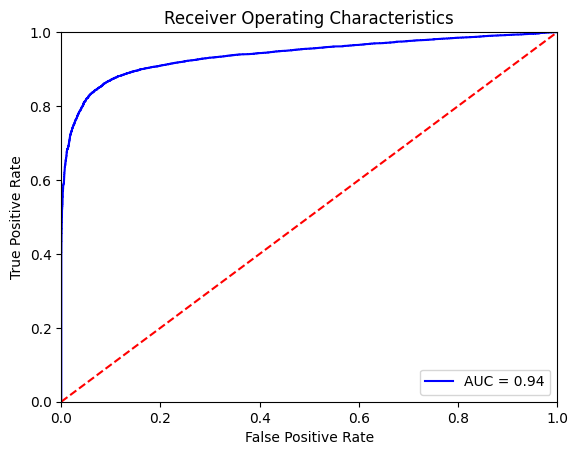

In [85]:
#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score, classification_report, roc_curve
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, logit_pred_test), columns=['predicted as 0', 'predicted as 1'])
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='crest')
plt.show()

fpr,tpr, threshold = roc_curve(y_test, y_prob)
roc_score = roc_auc_score(y_test,y_prob)
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [86]:
print("Accuracy of test data {0:.2f}".format(accuracy_score(y_test, logit_pred_test)))
print("Precision of test data {0:.2f}".format(precision_score(y_test, logit_pred_test)))
print("Recall of test data {0:.2f}".format(recall_score(y_test, logit_pred_test)))
print('AUC Score : ' + str(roc_auc_score(y_test,y_prob)))

accuracy_logit = accuracy_score(y_test, logit_pred_test)
precision_logit = precision_score(y_test, logit_pred_test)
recall_logit = recall_score(y_test, logit_pred_test)
roc_logit = roc_auc_score(y_test,y_prob)

Accuracy of test data 0.89
Precision of test data 0.90
Recall of test data 0.87
AUC Score : 0.938270631885862


In [87]:
print("Accuracy of train data {0:.2f}".format(accuracy_score(y_train, logit_pred_train)))
print("Precision of train data {0:.2f}".format(precision_score(y_train, logit_pred_train)))
print("Recall of train data {0:.2f}".format(recall_score(y_train, logit_pred_train)))

accuracy_logit_train = accuracy_score(y_train, logit_pred_train)
precision_logit_train = precision_score(y_train, logit_pred_train)
recall_logit_train = recall_score(y_train, logit_pred_train)

Accuracy of train data 0.88
Precision of train data 0.90
Recall of train data 0.87


### Decision Tree

In [88]:
feature_set_no_int = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 
                 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
                 'tolazamide', 'insulin', 'glyburide_metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian', 
                 'Hispanic', 'Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_5', 
                 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 
                 'admission_source_id_4', 'admission_source_id_7', 
                 'admission_source_id_9', 'max_glu_serum_0', 
                 'max_glu_serum_1', 'A1Cresult_0', 'A1Cresult_1', 
                 'level1_diag1_1.0',
                 'level1_diag1_2.0',
                 'level1_diag1_3.0',
                 'level1_diag1_4.0',
                 'level1_diag1_5.0',
                 'level1_diag1_6.0',
                 'level1_diag1_7.0',
                 'level1_diag1_8.0']

In [89]:
X = df_pd[feature_set_no_int]
y = df_pd['readmitted']
df_pd['readmitted'].value_counts()

0    54635
1     5071
Name: readmitted, dtype: int64

In [90]:
print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 54635, 1: 5071})
New dataset shape Counter({0: 54635, 1: 54635})


In [91]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

In [92]:
dtree_pred_test = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred_test, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,2102,1871,3973
1,213,207,420
All,2315,2078,4393


In [93]:
dtree_pred_train = dtree.predict(X_train)

In [94]:
print("Accuracy of test data {0:.2f}".format(accuracy_score(y_test, dtree_pred_test)))
print("Precision of test data {0:.2f}".format(precision_score(y_test, dtree_pred_test)))
print("Recall of test data {0:.2f}".format(recall_score(y_test, dtree_pred_test)))

accuracy_dtree = accuracy_score(y_test, dtree_pred_test)
precision_dtree = precision_score(y_test, dtree_pred_test)
recall_dtree = recall_score(y_test, dtree_pred_test)

Accuracy of test data 0.89
Precision of test data 0.91
Recall of test data 0.87


In [95]:
print("Accuracy of train data {0:.2f}".format(accuracy_score(y_train, dtree_pred_train)))
print("Precision of train data {0:.2f}".format(precision_score(y_train, dtree_pred_train)))
print("Recall of train data {0:.2f}".format(recall_score(y_train, dtree_pred_train)))

accuracy_dtree_train = accuracy_score(y_train, dtree_pred_train)
precision_dtree_train = precision_score(y_train, dtree_pred_train)
recall_dtree_train = recall_score(y_train, dtree_pred_train)

Accuracy of train data 0.94
Precision of train data 0.97
Recall of train data 0.92


<AxesSubplot:>

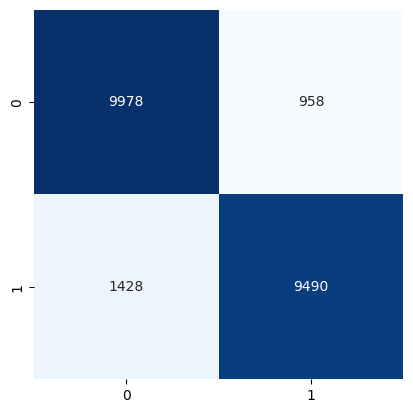

In [96]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, dtree_pred_test)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

                       Feature  Importance
4      number_outpatient_log1p    0.008502
8                    metformin    0.008953
29  discharge_disposition_id_2    0.009210
19                     insulin    0.009292
26                    gender_1    0.010403
0                          age    0.033392
7             number_diagnoses    0.060138
2               num_procedures    0.079787
3              num_medications    0.084454
1             time_in_hospital    0.560139


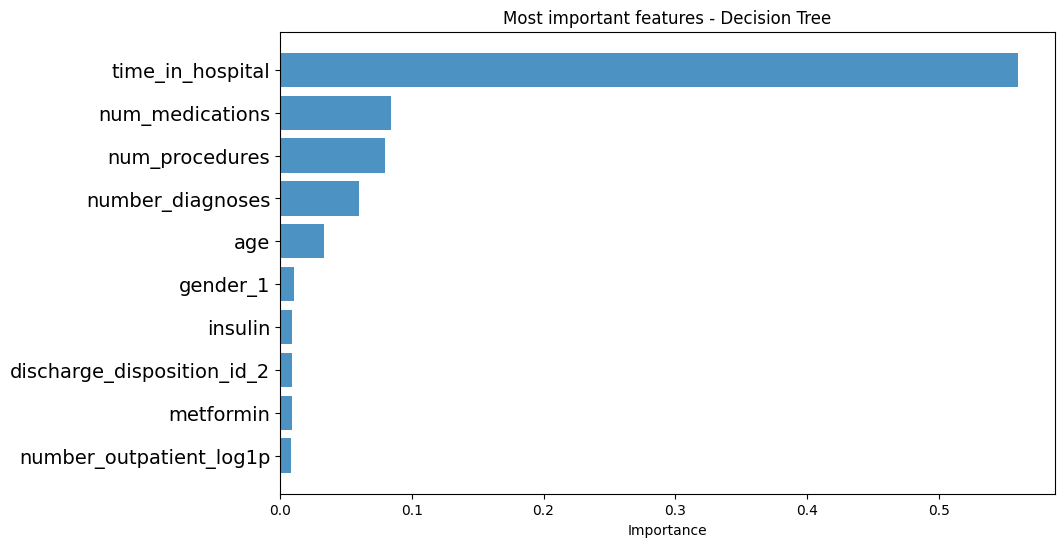

In [97]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dtree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

### Random Forest

In [98]:
X = df_pd[feature_set_no_int]
y = df_pd['readmitted']

print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 54635, 1: 5071})
New dataset shape Counter({0: 54635, 1: 54635})


In [99]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=10)

In [100]:
rm_prd_test = rm.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(rm_prd_test, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,1912,2061,3973
1,218,202,420
All,2130,2263,4393


In [101]:
rm_prd_train = rm.predict(X_train)

In [102]:
print("Accuracy of test data {0:.2f}".format(accuracy_score(y_test, rm_prd_test)))
print("Precision of test data {0:.2f}".format(precision_score(y_test, rm_prd_test)))
print("Recall of test data {0:.2f}".format(recall_score(y_test, rm_prd_test)))

accuracy_rm = accuracy_score(y_test, rm_prd_test)
precision_rm = precision_score(y_test, rm_prd_test)
recall_rm = recall_score(y_test, rm_prd_test)

Accuracy of test data 0.88
Precision of test data 0.87
Recall of test data 0.89


In [103]:
print("Accuracy of train data {0:.2f}".format(accuracy_score(y_train, rm_prd_train)))
print("Precision of train data {0:.2f}".format(precision_score(y_train, rm_prd_train)))
print("Recall of train data {0:.2f}".format(recall_score(y_train, rm_prd_train)))

accuracy_rm_train = accuracy_score(y_train, rm_prd_train)
precision_rm_train = precision_score(y_train, rm_prd_train)
recall_rm_train = recall_score(y_train, rm_prd_train)

Accuracy of train data 0.91
Precision of train data 0.90
Recall of train data 0.94


<AxesSubplot:>

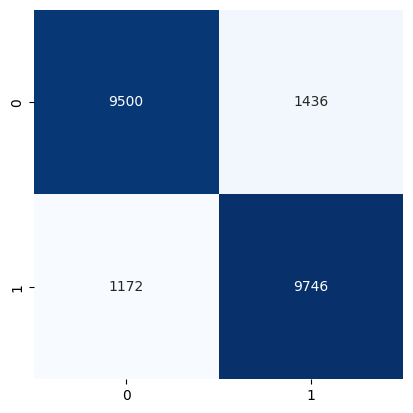

In [104]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, rm_prd_test)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

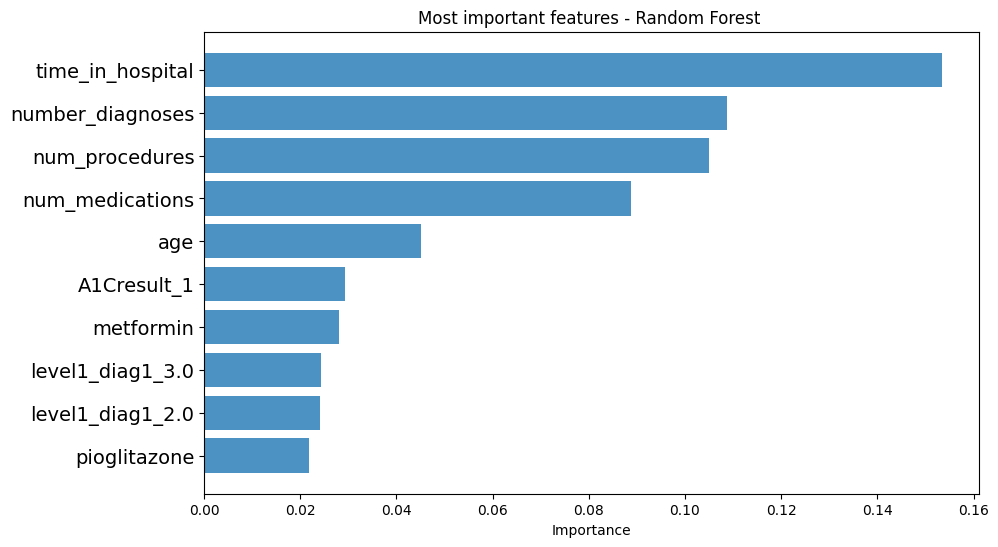

In [105]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = rm.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

## K Nearest Neighbors(KNN)

In [106]:
X = df_pd[feature_set_no_int]
y = df_pd['readmitted']

print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 54635, 1: 5071})
New dataset shape Counter({0: 54635, 1: 54635})


In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [108]:
Knn_prd_test = knn.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(Knn_prd_test, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,520,3453,3973
1,53,367,420
All,573,3820,4393


In [109]:
Knn_prd_train = knn.predict(X_train)

In [110]:
print("Accuracy of test data {0:.2f}".format(accuracy_score(y_test, Knn_prd_test)))
print("Precision of test data {0:.2f}".format(precision_score(y_test, Knn_prd_test)))
print("Recall of test data {0:.2f}".format(recall_score(y_test, Knn_prd_test)))

accuracy_Knn = accuracy_score(y_test, Knn_prd_test)
precision_Knn = precision_score(y_test, Knn_prd_test)
recall_Knn = recall_score(y_test, Knn_prd_test)

Accuracy of test data 0.60
Precision of test data 0.56
Recall of test data 0.97


In [111]:
print("Accuracy of train data {0:.2f}".format(accuracy_score(y_train, Knn_prd_train)))
print("Precision of train data {0:.2f}".format(precision_score(y_train, Knn_prd_train)))
print("Recall of train data {0:.2f}".format(recall_score(y_train, Knn_prd_train)))

accuracy_Knn_train = accuracy_score(y_train, Knn_prd_train)
precision_Knn_train = precision_score(y_train, Knn_prd_train)
recall_Knn_train = recall_score(y_train, Knn_prd_train)

Accuracy of train data 0.61
Precision of train data 0.56
Recall of train data 0.97


<AxesSubplot:>

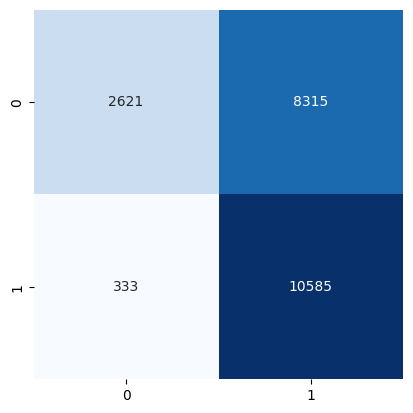

In [112]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, Knn_prd_test)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

## Naive Bayes

In [113]:
X = df_pd[feature_set_no_int]
y = df_pd['readmitted']

print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 54635, 1: 5071})
New dataset shape Counter({0: 54635, 1: 54635})


In [114]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

nb = BernoulliNB()
nb.fit(X_train, y_train)

BernoulliNB()

In [115]:
nb_prd_test = nb.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(nb_prd_test, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,1822,2151,3973
1,195,225,420
All,2017,2376,4393


In [116]:
nb_prd_train = nb.predict(X_train)

In [117]:
print("Accuracy of test data {0:.2f}".format(accuracy_score(y_test, nb_prd_test)))
print("Precision of test data {0:.2f}".format(precision_score(y_test, nb_prd_test)))
print("Recall of test data {0:.2f}".format(recall_score(y_test, nb_prd_test)))

accuracy_nb = accuracy_score(y_test, nb_prd_test)
precision_nb = precision_score(y_test, nb_prd_test)
recall_nb = recall_score(y_test, nb_prd_test)

Accuracy of test data 0.72
Precision of test data 0.70
Recall of test data 0.76


In [118]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_train, nb_prd_train)))
print("Precision is {0:.2f}".format(precision_score(y_train, nb_prd_train)))
print("Recall is {0:.2f}".format(recall_score(y_train, nb_prd_train)))

accuracy_nb_train = accuracy_score(y_train, nb_prd_train)
precision_nb_train = precision_score(y_train, nb_prd_train)
recall_nb_train = recall_score(y_train, nb_prd_train)

Accuracy is 0.72
Precision is 0.70
Recall is 0.76


<AxesSubplot:>

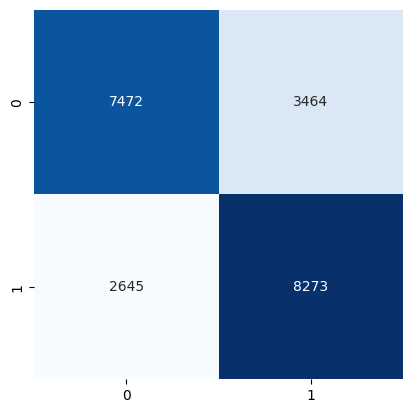

In [119]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, nb_prd_test)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

## Stochastic gradient descent

In [120]:
X = df_pd[feature_set_no_int]
y = df_pd['readmitted']

print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 54635, 1: 5071})
New dataset shape Counter({0: 54635, 1: 54635})


In [121]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(loss = 'log', alpha = 0.1, random_state = 42)
sgdc.fit(X_train, y_train)

C:\Users\sivas\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(alpha=0.1, loss='log', random_state=42)

In [122]:
sgdc_prd_test = sgdc.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(sgdc_prd_test, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,2455,1518,3973
1,248,172,420
All,2703,1690,4393


In [123]:
sgdc_prd_train = sgdc.predict(X_train)

In [124]:
print("Accuracy of test data {0:.2f}".format(accuracy_score(y_test, sgdc_prd_test)))
print("Precision of test data {0:.2f}".format(precision_score(y_test, sgdc_prd_test)))
print("Recall of test data {0:.2f}".format(recall_score(y_test, sgdc_prd_test)))

accuracy_sgdc = accuracy_score(y_test, sgdc_prd_test)
precision_sgdc = precision_score(y_test, sgdc_prd_test)
recall_sgdc = recall_score(y_test, sgdc_prd_test)

Accuracy of test data 0.63
Precision of test data 0.67
Recall of test data 0.51


In [125]:
print("Accuracy of train data {0:.2f}".format(accuracy_score(y_train, sgdc_prd_train)))
print("Precision of train data {0:.2f}".format(precision_score(y_train, sgdc_prd_train)))
print("Recall of train data {0:.2f}".format(recall_score(y_train, sgdc_prd_train)))

accuracy_sgdc_train = accuracy_score(y_train, sgdc_prd_train)
precision_sgdc_train = precision_score(y_train, sgdc_prd_train)
recall_sgdc_train = recall_score(y_train, sgdc_prd_train)

Accuracy of train data 0.63
Precision of train data 0.67
Recall of train data 0.51


<AxesSubplot:>

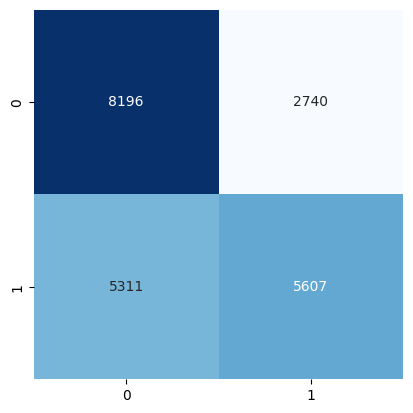

In [126]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, sgdc_prd_test)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

## Gradient Boosting Classifier

In [127]:
X = df_pd[feature_set_no_int]
y = df_pd['readmitted']

print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 54635, 1: 5071})
New dataset shape Counter({0: 54635, 1: 54635})


In [128]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_model = GradientBoostingClassifier(random_state=42)
gradient_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [129]:
gradient_model_prd_test = gradient_model.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(gradient_model_prd_test, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,2154,1819,3973
1,238,182,420
All,2392,2001,4393


In [130]:
gradient_model_prd_train = gradient_model.predict(X_train)

In [131]:
print("Accuracy of test data {0:.2f}".format(accuracy_score(y_test, gradient_model_prd_test)))
print("Precision of test data {0:.2f}".format(precision_score(y_test, gradient_model_prd_test)))
print("Recall of test data {0:.2f}".format(recall_score(y_test, gradient_model_prd_test)))

accuracy_gradient = accuracy_score(y_test, gradient_model_prd_test)
precision_gradient = precision_score(y_test, gradient_model_prd_test)
recall_gradient = recall_score(y_test, gradient_model_prd_test)

Accuracy of test data 0.88
Precision of test data 0.92
Recall of test data 0.84


In [132]:
print("Accuracy of train data {0:.2f}".format(accuracy_score(y_train, gradient_model_prd_train)))
print("Precision of train data {0:.2f}".format(precision_score(y_train, gradient_model_prd_train)))
print("Recall of train data {0:.2f}".format(recall_score(y_train, gradient_model_prd_train)))

accuracy_gradient_train = accuracy_score(y_train, gradient_model_prd_train)
precision_gradient_train = precision_score(y_train, gradient_model_prd_train)
recall_gradient_train = recall_score(y_train, gradient_model_prd_train)

Accuracy of train data 0.88
Precision of train data 0.92
Recall of train data 0.84


<AxesSubplot:>

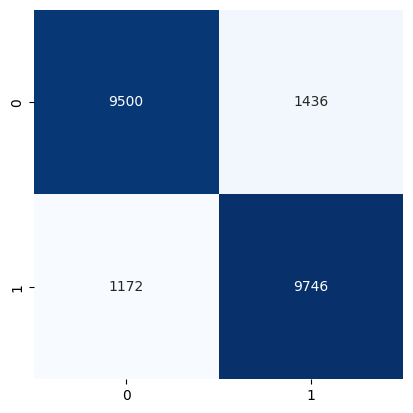

In [133]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, rm_prd_test)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

## XGBOOST Classifier

In [134]:
feature_set_no_int_1 = ['time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 
                 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
                 'tolazamide', 'insulin', 'glyburide_metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian', 
                 'Hispanic', 'Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_5', 
                 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 
                 'admission_source_id_4', 'admission_source_id_7', 
                 'admission_source_id_9', 'max_glu_serum_0', 
                 'max_glu_serum_1', 'A1Cresult_0', 'A1Cresult_1', 
                 'level1_diag1_1.0',
                 'level1_diag1_2.0',
                 'level1_diag1_3.0',
                 'level1_diag1_4.0',
                 'level1_diag1_5.0',
                 'level1_diag1_6.0',
                 'level1_diag1_7.0',
                 'level1_diag1_8.0']

In [135]:
X = df_pd[feature_set_no_int_1]
y = df_pd['readmitted']

print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 54635, 1: 5071})
New dataset shape Counter({0: 54635, 1: 54635})


In [136]:
import xgboost
from xgboost import XGBClassifier

xgb_model = xgboost.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [137]:
xgb_model_prd_test = xgb_model.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(xgb_model_prd_test, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,2178,1795,3973
1,239,181,420
All,2417,1976,4393


In [138]:
xgb_model_prd_train = xgb_model.predict(X_train)

In [139]:
print("Accuracy of test data {0:.2f}".format(accuracy_score(y_test, xgb_model_prd_test)))
print("Precision of test data {0:.2f}".format(precision_score(y_test, xgb_model_prd_test)))
print("Recall of test data {0:.2f}".format(recall_score(y_test, xgb_model_prd_test)))

accuracy_xgb = accuracy_score(y_test, xgb_model_prd_test)
precision_xgb = precision_score(y_test, xgb_model_prd_test)
recall_xgb = recall_score(y_test, xgb_model_prd_test)

Accuracy of test data 0.95
Precision of test data 1.00
Recall of test data 0.90


In [140]:
print("Accuracy of train data {0:.2f}".format(accuracy_score(y_train, xgb_model_prd_train)))
print("Precision of train data {0:.2f}".format(precision_score(y_train, xgb_model_prd_train)))
print("Recall of train data {0:.2f}".format(recall_score(y_train, xgb_model_prd_train)))

accuracy_xgb_train = accuracy_score(y_train, xgb_model_prd_train)
precision_xgb_train = precision_score(y_train, xgb_model_prd_train)
recall_xgb_train = recall_score(y_train, xgb_model_prd_train)

Accuracy of train data 0.95
Precision of train data 1.00
Recall of train data 0.90


<AxesSubplot:>

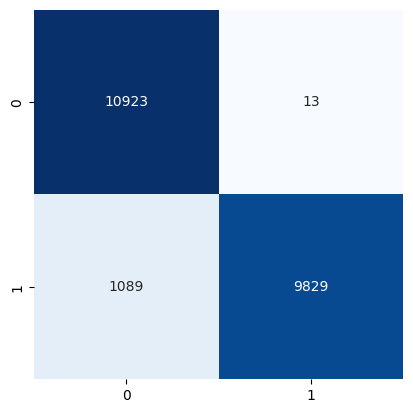

In [141]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, xgb_model_prd_test)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

## Light-GBM Classifier

In [142]:
X = df_pd[feature_set_no_int_1]
y = df_pd['readmitted']

print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 54635, 1: 5071})
New dataset shape Counter({0: 54635, 1: 54635})


In [143]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state = 42,max_depth=3)
lgbm_model.fit(X_train, y_train)

LGBMClassifier(max_depth=3, random_state=42)

In [144]:
lgbm_model_prd_test = lgbm_model.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(lgbm_model_prd_test, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,2264,1709,3973
1,248,172,420
All,2512,1881,4393


In [145]:
lgbm_model_prd_train = lgbm_model.predict(X_train)

In [146]:
print("Accuracy of test data {0:.2f}".format(accuracy_score(y_test, lgbm_model_prd_test)))
print("Precision of test data {0:.2f}".format(precision_score(y_test, lgbm_model_prd_test)))
print("Recall of test data {0:.2f}".format(recall_score(y_test, lgbm_model_prd_test)))

accuracy_lgbm = accuracy_score(y_test, lgbm_model_prd_test)
precision_lgbm = precision_score(y_test, lgbm_model_prd_test)
recall_lgbm = recall_score(y_test, lgbm_model_prd_test)

Accuracy of test data 0.86
Precision of test data 0.91
Recall of test data 0.80


In [147]:
print("Accuracy of train data {0:.2f}".format(accuracy_score(y_train, lgbm_model_prd_train)))
print("Precision of train data {0:.2f}".format(precision_score(y_train, lgbm_model_prd_train)))
print("Recall of train data {0:.2f}".format(recall_score(y_train, lgbm_model_prd_train)))

accuracy_lgbm_train = accuracy_score(y_train, lgbm_model_prd_train)
precision_lgbm_train = precision_score(y_train, lgbm_model_prd_train)
recall_lgbm_train = recall_score(y_train, lgbm_model_prd_train)

Accuracy of train data 0.86
Precision of train data 0.91
Recall of train data 0.79


<AxesSubplot:>

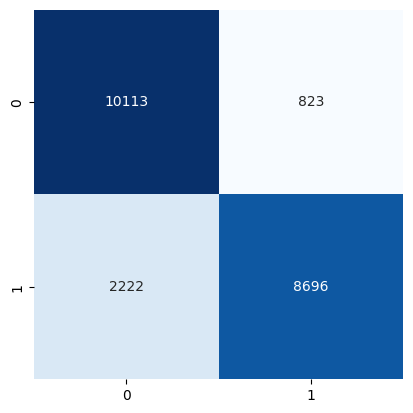

In [148]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, lgbm_model_prd_test)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

## CATBOOST Classifier

In [149]:
X = df_pd[feature_set_no_int]
y = df_pd['readmitted']

print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 54635, 1: 5071})
New dataset shape Counter({0: 54635, 1: 54635})


In [150]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(random_state = 42, max_depth=3)
cat_model.fit(X_train, y_train,verbose=False)

In [151]:
cat_model_prd_test = cat_model.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(cat_model_prd_test, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,2187,1786,3973
1,239,181,420
All,2426,1967,4393


In [152]:
cat_model_prd_train = cat_model.predict(X_train)

In [153]:
print("Accuracy of test data {0:.2f}".format(accuracy_score(y_test, cat_model_prd_test)))
print("Precision of test data {0:.2f}".format(precision_score(y_test, cat_model_prd_test)))
print("Recall of test data {0:.2f}".format(recall_score(y_test, cat_model_prd_test)))

accuracy_cat = accuracy_score(y_test, cat_model_prd_test)
precision_cat = precision_score(y_test, cat_model_prd_test)
recall_cat = recall_score(y_test, cat_model_prd_test)

Accuracy of test data 0.95
Precision of test data 1.00
Recall of test data 0.90


In [154]:
print("Accuracy of train data {0:.2f}".format(accuracy_score(y_train, cat_model_prd_train)))
print("Precision of train data {0:.2f}".format(precision_score(y_train, cat_model_prd_train)))
print("Recall of train data {0:.2f}".format(recall_score(y_train, cat_model_prd_train)))

accuracy_cat_train = accuracy_score(y_train, cat_model_prd_train)
precision_cat_train = precision_score(y_train, cat_model_prd_train)
recall_cat_train = recall_score(y_train, cat_model_prd_train)

Accuracy of train data 0.95
Precision of train data 1.00
Recall of train data 0.90


<AxesSubplot:>

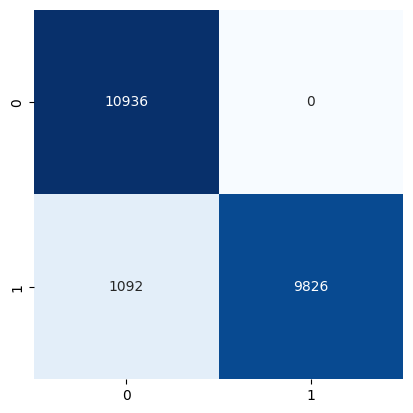

In [155]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, cat_model_prd_test)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

## Model Comparision

In [156]:
data_results = pd.DataFrame({'classifier':['LR','DT','RF','KNN','NB','SGD','GBC','XGB','LGBM','CATB'],
                           'accuracy':[accuracy_logit,accuracy_dtree,accuracy_rm,accuracy_Knn,accuracy_nb,accuracy_sgdc,accuracy_gradient,accuracy_xgb,accuracy_lgbm,accuracy_cat],
                           'Precision':[precision_logit,precision_dtree,precision_rm,precision_Knn,precision_nb,precision_sgdc,precision_gradient,precision_xgb,precision_lgbm,precision_cat],
                           'Recall':[recall_logit,recall_dtree,recall_rm,recall_Knn,recall_nb,recall_sgdc,recall_gradient,recall_xgb,recall_lgbm,recall_cat]
                          })

In [157]:
data_results.set_index('classifier', inplace = True)

In [158]:
data_results

,accuracy,Precision,Recall
classifier,,,
LR,0.886074,0.901360,0.868094
DT,0.890821,0.908308,0.869207
RF,0.880663,0.871579,0.892654
KNN,0.604283,0.560053,0.969500
NB,0.720463,0.704865,0.757740
SGD,0.631601,0.671738,0.513556
GBC,0.883637,0.920812,0.839256
XGB,0.949574,0.998679,0.900256
LGBM,0.860666,0.913541,0.796483


# Precision

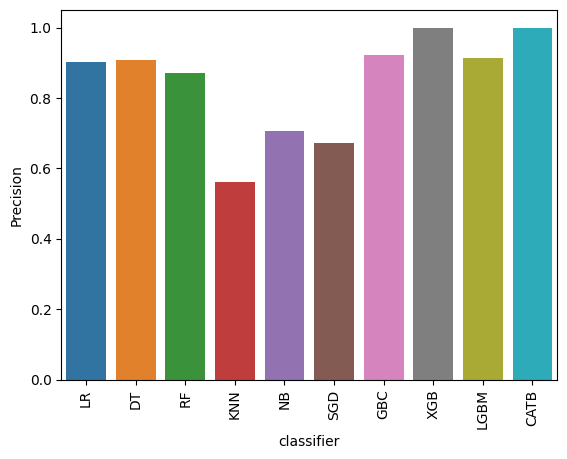

In [159]:
plot = sns.barplot(data=data_results, x=data_results.index, y=data_results['Precision'])
plt.xticks(rotation = 90)
plt.show()

# Recall

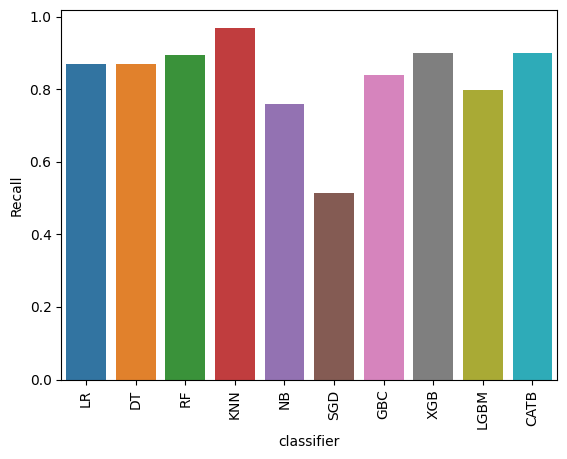

In [160]:
plot = sns.barplot(data=data_results, x=data_results.index, y=data_results['Recall'])
plt.xticks(rotation = 90)
plt.show()

# Accuracy

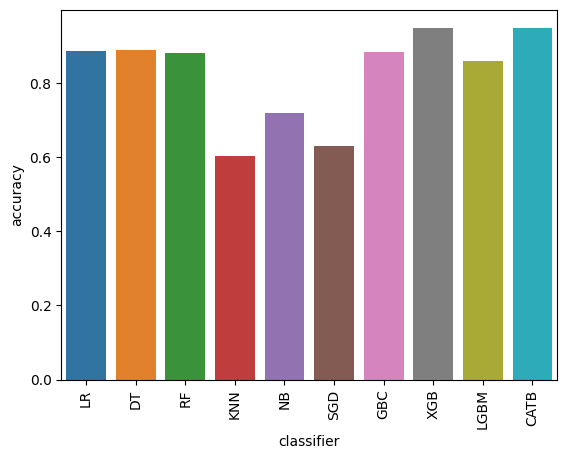

In [161]:
plot = sns.barplot(data=data_results, x=data_results.index, y=data_results['accuracy'],)
plt.xticks(rotation = 90)
plt.show()

In [162]:
test_result = accuracy_logit

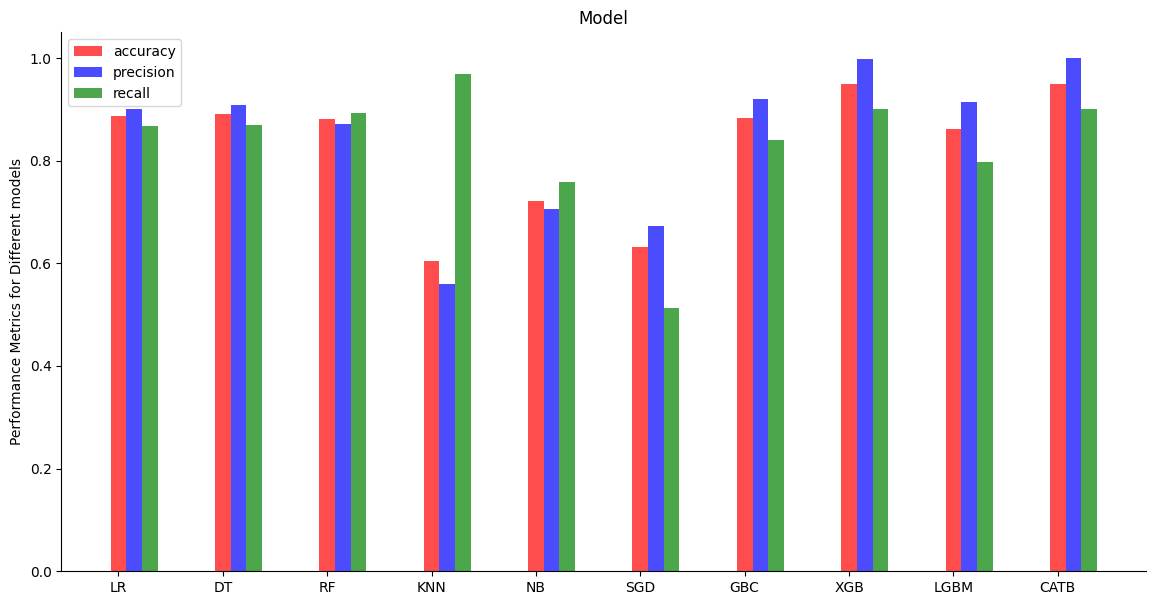

In [163]:
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

models = ['LR', 'DT', 'RF', 'KNN', 'NB', 'SGD', 'GBC', 'XGB', 'LGBM', 'CATB']
values = [accuracy_logit, accuracy_dtree, accuracy_rm,accuracy_Knn,accuracy_nb,accuracy_sgdc,accuracy_gradient,accuracy_xgb,accuracy_lgbm,accuracy_cat]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)
           

           
ax = plt.subplot(111)

models = ['LR', 'DT', 'RF', 'KNN', 'NB', 'SGD', 'GBC', 'XGB', 'LGBM', 'CATB']
values = [precision_logit, precision_dtree, precision_rm,precision_Knn,precision_nb,precision_sgdc,precision_gradient,precision_xgb,precision_lgbm,precision_cat]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['LR', 'DT', 'RF', 'KNN', 'NB', 'SGD', 'GBC', 'XGB', 'LGBM', 'CATB' ]
values = [recall_logit, recall_dtree, recall_rm,recall_Knn,recall_nb,recall_sgdc,recall_gradient,recall_xgb,recall_lgbm,recall_cat]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()           

In [164]:
Result_df = pd.DataFrame({'Models': ['Logistic_regression', 'Dicision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'SGD', 'GBC', 'XG Boost','LGBM','CATB'], 
                        'Test Precision Score' :[precision_logit, precision_dtree, precision_rm, precision_Knn, precision_nb, precision_sgdc, precision_gradient, precision_xgb, precision_lgbm, precision_cat],
                        'Train Precision score' :[precision_logit_train, precision_dtree_train, precision_rm_train, precision_Knn_train, precision_nb_train, precision_sgdc_train, precision_gradient_train, precision_xgb_train, precision_lgbm_train, precision_cat_train]})

In [165]:
Result_df.set_index('Models')

,Test Precision Score,Train Precision score
Models,,
Logistic_regression,0.901360,0.897387
Dicision Tree,0.908308,0.967719
Random Forest,0.871579,0.898264
KNN,0.560053,0.562263
Naive Bayes,0.704865,0.702153
SGD,0.671738,0.671579
GBC,0.920812,0.921071
XG Boost,0.998679,0.999848
LGBM,0.913541,0.912812


In [166]:
Result_df_1 = pd.DataFrame({'Models': ['Logistic_regression', 'Dicision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'SGD', 'GBC', 'XG Boost','LGBM','CATB'], 
                        'Test Recall Score' :[recall_logit, recall_dtree, recall_rm, recall_Knn, recall_nb, recall_sgdc, recall_gradient, recall_xgb, recall_lgbm, recall_cat],
                        'Train Recall score' :[recall_logit_train, recall_dtree_train, recall_rm_train, recall_Knn_train, recall_nb_train, recall_sgdc_train, recall_gradient_train, recall_xgb_train, recall_lgbm_train, recall_cat_train]})

In [167]:
Result_df_1.set_index('Models')

,Test Recall Score,Train Recall score
Models,,
Logistic_regression,0.868094,0.866970
Dicision Tree,0.869207,0.919574
Random Forest,0.892654,0.935311
KNN,0.969500,0.972208
Naive Bayes,0.757740,0.756616
SGD,0.513556,0.514994
GBC,0.839256,0.838713
XG Boost,0.900256,0.901457
LGBM,0.796483,0.794840


1. In the above comparison some of the algorithms like KNN, SGD, Naive Bayes, LGBM has high precision score and low recall score and so vice versa. 
2. certain algorithm has good train score and some has Low test score and so vice versa.
3. XGBoost and CATBoost algorithm results in overfitting of model.

    ~ As We Can See that Decision Tree has Good Training Score and Testing Score in precision and recall, there is no much deviation in train test comparison, so Decision Tree is the Best Model For this Dataset. ~

## Final Model 

In [168]:
feature_set_no_int_2 = ['time_in_hospital','num_medications','num_procedures','number_diagnoses',
                    'age','gender_1','insulin','discharge_disposition_id_2','metformin','number_outpatient_log1p']

In [169]:
X = df_pd[feature_set_no_int_2]
y = df_pd['readmitted']
df_pd['readmitted'].value_counts()

0    54635
1     5071
Name: readmitted, dtype: int64

In [170]:
print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 54635, 1: 5071})
New dataset shape Counter({0: 54635, 1: 54635})


In [171]:
train_input_new.columns

Index(['time_in_hospital', 'num_medications', 'num_procedures',
       'number_diagnoses', 'age', 'gender_1', 'insulin',
       'discharge_disposition_id_2', 'metformin', 'number_outpatient_log1p'],
      dtype='object')

In [173]:
from sklearn.tree import DecisionTreeClassifier
dtree_1 = DecisionTreeClassifier(max_depth=28, criterion = "gini", min_samples_split=10)
dtree_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=28, min_samples_split=10)

In [174]:
dtree_pred_test_1 = dtree_1.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred_test_1, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,2095,1878,3973
1,241,179,420
All,2336,2057,4393


In [175]:
dtree_pred_train_1 = dtree_1.predict(X_train)

In [176]:
print("Accuracy of test data {0:.2f}".format(accuracy_score(y_test, dtree_pred_test_1)))
print("Precision of test data {0:.2f}".format(precision_score(y_test, dtree_pred_test_1)))
print("Recall of test data {0:.2f}".format(recall_score(y_test, dtree_pred_test_1)))

accuracy_dtree_1 = accuracy_score(y_test, dtree_pred_test_1)
precision_dtree_1 = precision_score(y_test, dtree_pred_test_1)
recall_dtree_1 = recall_score(y_test, dtree_pred_test_1)

Accuracy of test data 0.90
Precision of test data 0.93
Recall of test data 0.87


In [177]:
print("Accuracy of train data {0:.2f}".format(accuracy_score(y_train, dtree_pred_train_1)))
print("Precision of train data {0:.2f}".format(precision_score(y_train, dtree_pred_train_1)))
print("Recall of train data {0:.2f}".format(recall_score(y_train, dtree_pred_train_1)))

accuracy_dtree_train_1 = accuracy_score(y_train, dtree_pred_train_1)
precision_dtree_train_1 = precision_score(y_train, dtree_pred_train_1)
recall_dtree_train_1 = recall_score(y_train, dtree_pred_train_1)

Accuracy of train data 0.94
Precision of train data 0.97
Recall of train data 0.91


In [178]:
y_prob_1 = dtree_1.predict_proba(X_test)[:,1]

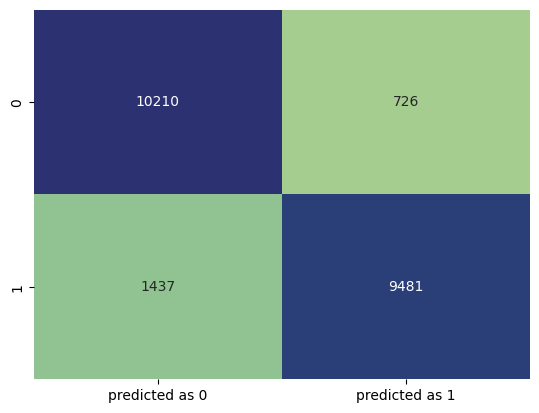

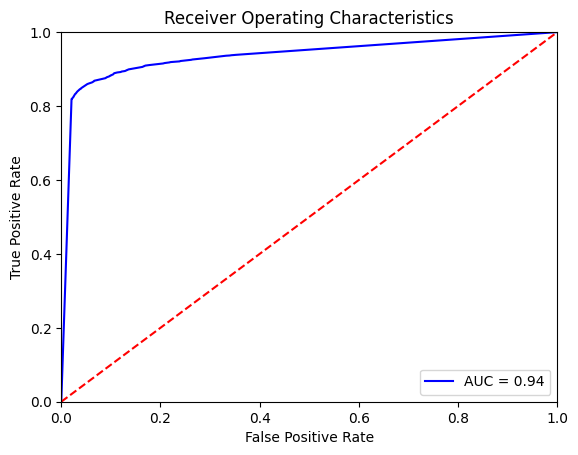

In [179]:
#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score, classification_report, roc_curve
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, dtree_pred_test_1), columns=['predicted as 0', 'predicted as 1'])
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='crest')
plt.show()

fpr,tpr, threshold = roc_curve(y_test, y_prob_1)
roc_score = roc_auc_score(y_test,y_prob_1)
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

    ~ Decision tree model with top 10 important features alone able to give good and slightly improved Precision and Recall Score compared to decision tree model build with all the features in dataset ~

## Feature Importance

In [180]:
X_train.columns

Index(['time_in_hospital', 'num_medications', 'num_procedures',
       'number_diagnoses', 'age', 'gender_1', 'insulin',
       'discharge_disposition_id_2', 'metformin', 'number_outpatient_log1p'],
      dtype='object')

In [181]:
fi_df = pd.DataFrame({'Features' : X_train.columns, 'Importances' : dtree_1.feature_importances_}).sort_values(by = 'Importances', ascending = False)
fi_df

,Features,Importances
0,time_in_hospital,0.518715
1,num_medications,0.168088
2,num_procedures,0.111327
3,number_diagnoses,0.094182
4,age,0.040676
5,gender_1,0.015496
6,insulin,0.015239
7,discharge_disposition_id_2,0.014400
9,number_outpatient_log1p,0.012153
8,metformin,0.009725


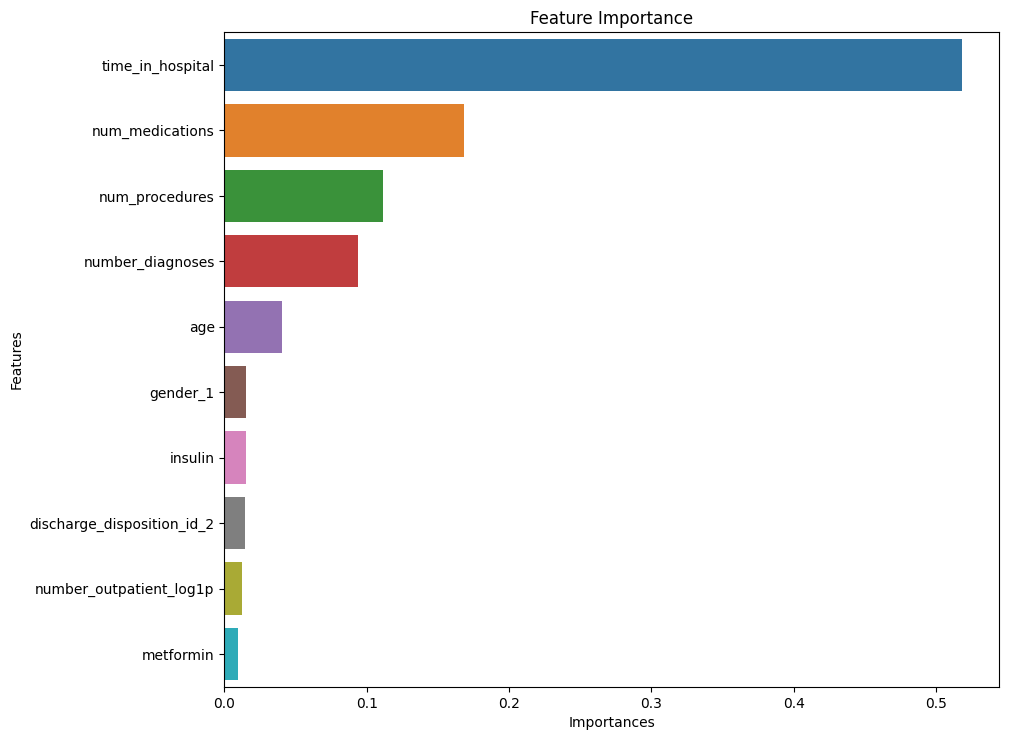

In [182]:
fig = plt.figure(figsize = (10, 8.5))
sns.barplot(y=fi_df['Features'][:12], 
            x = fi_df['Importances'][:12],
            orient='h')
plt.title("Feature Importance")
plt.show()

In [183]:
result_1 = dtree_1.score(X_test, y_test)
result_1

0.9010249839846253

# Making Pickle file

In [184]:
import pickle

In [185]:
# save the model to disk
pickle_out = open("model.pkl","wb")
pickle.dump(dtree_1, pickle_out)
pickle_out.close()

In [187]:
# load the model from disk
pickle_in = open("model.pkl", "rb")
pickle.load(pickle_in)

DecisionTreeClassifier(max_depth=28, min_samples_split=10)